# Full dataset

## Read data

In [1]:
import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 101)
pd.set_option('float_format', '{:0.2f}'.format)

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
import numpy as np

In [4]:
import sklearn

In [5]:
df = pd.read_csv("/content/faa_data.csv")

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 285560 entries, 0 to 285559
Columns: 101 entries, Unnamed: 0 to TRANSFER
dtypes: bool(37), float64(21), int64(4), object(39)
memory usage: 149.5+ MB


Comment: There are 15639 entries in the year 2021.     
39 columns of boolean type.   
22 columns of numeric type.    
41 columns of string type.

In [7]:
df.head(3)

,Unnamed: 0,INDEX_NR,INCIDENT_DATE,INCIDENT_MONTH,INCIDENT_YEAR,TIME,TIME_OF_DAY,AIRPORT_ID,AIRPORT,LATITUDE,LONGITUDE,RUNWAY,STATE,FAAREGION,LOCATION,ENROUTE_STATE,OPID,OPERATOR,REG,FLT,AIRCRAFT,AMA,AMO,EMA,EMO,AC_CLASS,AC_MASS,TYPE_ENG,NUM_ENGS,ENG_1_POS,ENG_2_POS,ENG_3_POS,ENG_4_POS,PHASE_OF_FLIGHT,HEIGHT,SPEED,DISTANCE,SKY,PRECIPITATION,AOS,COST_REPAIRS,COST_OTHER,COST_REPAIRS_INFL_ADJ,COST_OTHER_INFL_ADJ,INGESTED_OTHER,INDICATED_DAMAGE,DAMAGE_LEVEL,STR_RAD,DAM_RAD,STR_WINDSHLD,DAM_WINDSHLD,STR_NOSE,DAM_NOSE,STR_ENG1,DAM_ENG1,ING_ENG1,STR_ENG2,DAM_ENG2,ING_ENG2,STR_ENG3,DAM_ENG3,ING_ENG3,STR_ENG4,DAM_ENG4,ING_ENG4,STR_PROP,DAM_PROP,STR_WING_ROT,DAM_WING_ROT,STR_FUSE,DAM_FUSE,STR_LG,DAM_LG,STR_TAIL,DAM_TAIL,STR_LGHTS,DAM_LGHTS,STR_OTHER,DAM_OTHER,OTHER_SPECIFY,EFFECT,EFFECT_OTHER,BIRD_BAND_NUMBER,SPECIES_ID,SPECIES,REMARKS,REMAINS_COLLECTED,REMAINS_SENT,WARNED,NUM_SEEN,NUM_STRUCK,SIZE,NR_INJURIES,NR_FATALITIES,COMMENTS,REPORTED_NAME,REPORTED_TITLE,SOURCE,PERSON,LUPDATE,TRANSFER
0,0,608242,1996-06-22,6,1996,NaN,NaN,KSMF,SACRAMENTO INTL,38.70,-121.59,NaN,CA,AWP,NaN,NaN,UAL,UNITED AIRLINES,NaN,1768.00,B-737-300,148,24,10.00,1.00,A,4.00,D,2.00,1.00,1.00,NaN,NaN,Take-off Run,0.00,NaN,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,NaN,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,NaN,NaN,NaN,NaN,UNKBM,Unknown bird - medium,BLOOD ON L FWD NOSE AREA SEEN BY CREW AFTER LDG.,False,False,Unknown,NaN,1,Medium,NaN,NaN,/Legacy Record=100001/,REDACTED,REDACTED,Air Transport Report,Air Transport Operations,2007-12-20,False
1,1,608243,1996-06-26,6,1996,NaN,NaN,KDEN,DENVER INTL AIRPORT,39.86,-104.67,NaN,CO,ANM,NaN,NaN,UAL,UNITED AIRLINES,NaN,1845.00,B-737-300,148,24,10.00,1.00,A,4.00,D,2.00,1.00,1.00,NaN,NaN,Take-off Run,0.00,NaN,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,NaN,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,NaN,NaN,NaN,NaN,UNKBM,Unknown bird - medium,CREW SUSPECTED BIRDSTRIKE ON T/O. LOOKED LIKE ...,False,False,Unknown,NaN,1,Medium,NaN,NaN,/Legacy Record=100002/,REDACTED,REDACTED,Air Transport Report,Air Transport Operations,2007-12-20,False
2,2,608244,1996-07-01,7,1996,NaN,NaN,KOMA,EPPLEY AIRFIELD,41.30,-95.89,NaN,NE,ACE,NaN,NaN,UAL,UNITED AIRLINES,NaN,306.00,B-757-200,148,26,34.00,40.00,A,4.00,D,2.00,1.00,1.00,NaN,NaN,Take-off Run,0.00,NaN,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,N,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,NaN,NaN,NaN,NaN,UNKBM,Unknown bird - medium,BIRDSTRIKE AT ROTATION. INSPN. NO DMG.,False,False,Unknown,NaN,1,Medium,NaN,NaN,/Legacy Record=100003/,REDACTED,REDACTED,Air Transport Report,Air Transport Operations,2007-12-20,False


In [8]:
columns = df.columns.tolist()
print(columns)

['Unnamed: 0', 'INDEX_NR', 'INCIDENT_DATE', 'INCIDENT_MONTH', 'INCIDENT_YEAR', 'TIME', 'TIME_OF_DAY', 'AIRPORT_ID', 'AIRPORT', 'LATITUDE', 'LONGITUDE', 'RUNWAY', 'STATE', 'FAAREGION', 'LOCATION', 'ENROUTE_STATE', 'OPID', 'OPERATOR', 'REG', 'FLT', 'AIRCRAFT', 'AMA', 'AMO', 'EMA', 'EMO', 'AC_CLASS', 'AC_MASS', 'TYPE_ENG', 'NUM_ENGS', 'ENG_1_POS', 'ENG_2_POS', 'ENG_3_POS', 'ENG_4_POS', 'PHASE_OF_FLIGHT', 'HEIGHT', 'SPEED', 'DISTANCE', 'SKY', 'PRECIPITATION', 'AOS', 'COST_REPAIRS', 'COST_OTHER', 'COST_REPAIRS_INFL_ADJ', 'COST_OTHER_INFL_ADJ', 'INGESTED_OTHER', 'INDICATED_DAMAGE', 'DAMAGE_LEVEL', 'STR_RAD', 'DAM_RAD', 'STR_WINDSHLD', 'DAM_WINDSHLD', 'STR_NOSE', 'DAM_NOSE', 'STR_ENG1', 'DAM_ENG1', 'ING_ENG1', 'STR_ENG2', 'DAM_ENG2', 'ING_ENG2', 'STR_ENG3', 'DAM_ENG3', 'ING_ENG3', 'STR_ENG4', 'DAM_ENG4', 'ING_ENG4', 'STR_PROP', 'DAM_PROP', 'STR_WING_ROT', 'DAM_WING_ROT', 'STR_FUSE', 'DAM_FUSE', 'STR_LG', 'DAM_LG', 'STR_TAIL', 'DAM_TAIL', 'STR_LGHTS', 'DAM_LGHTS', 'STR_OTHER', 'DAM_OTHER', 'OT

In [9]:
identifier_columns = ['INDX_NR', 'AIRPORT_ID', 'AIRPORT', 'SPECIES_ID', 'SPECIES', 'OUT_OF_RANGE_SPECIES', 'BIRD_BAND_NUMBER', 'SIZE', 'COMMENTS',
                      'REPORTER_NAME', 'REPORTER_TITLE', 'SOURCE', 'PERSON', 'LUPDATE', 'IMAGE', 'TRANSFER'
                      ]

In [10]:
aircraft_columns = ['OPID', 'OPERATOR', 'FLT', 'AIRCRAFT', 'AMA', 'AMO', 'AC_CLASS', 'AC_MASS', 'AOS', 'EFFECT', 'EFFECT_OTHER', ]

In [11]:
engine_columns = ['EMA', 'EMO', 'TYPE_ENG', 'NUM_ENGS', 'ENG_1_POS', 'ENG_2_POS', 'ENG_3_POS', 'ENG_4_POS',]

In [12]:
damage_columns = ['DAMAGE_LEVEL', 'INDICATED_DAMAGE', 'STR_RAD', 'DAM_RAD', 'STR_WINDSHLD', 'DAM_WINDSHLD', 'STR_NOSE', 'DAM_NOSE',
                  'STR_ENG1', 'DAM_ENG1', 'ING_ENG1', 'STR_ENG2', 'DAM_ENG2', 'ING_ENG2', 'STR_ENG3', 'DAM_ENG3', 'ING_ENG3', 'STR_ENG4', 'DAM_ENG4',
                  'ING_ENG4', 'STR_PROP', 'DAM_PROP', 'STR_WING_ROT', 'DAM_WING_ROT', 'STR_FUSE', 'DAM_FUSE', 'STR_LG', 'DAM_LG', 'STR_TAIL', 'DAM_TAIL',
                  'STR_LGHTS', 'DAM_LGHTS', 'STR_OTHER', 'DAM_OTHER', 'OTHER_SPECIFY', 'INGESTED_OTHER',
                  ]

In [13]:
cost_columns = ['COST_REPAIRS', 'COST_OTHER', 'COST_REPAIRS_INFL_ADJ', 'COST_OTHER_INFL_ADJ']

In [14]:
incident_columns = ['INCIDENT_DATE', 'INCIDENT_MONTH', 'INCIDENT_YEAR', 'TIME', 'TIME_OF_DAY', 'LATITUDE', 'LONGITUDE', 'RUNWAY', 'STATE', 'FAAREGION', 'LOCATION',
                    'ENROUTE_STATE', 'PHASE_OF_FLIGHT', 'HEIGHT', 'SPEED', 'DISTANCE', 'SKY', 'PRECIPITATION', 'REMARKS', 'REMAINS_COLLECTED', 'REMAINS_SENT',
                    'WARNED', 'NUM_SEEN', 'NUM_STRUCK', 'NR_INJURIES', 'NR_FATALITIES',
                    ]

## Indicated Damage Vs Damage Level

In [ ]:
indicated = df.INDICATED_DAMAGE
damage_level = df.DAMAGE_LEVEL

In [ ]:
indicated.info()

<class 'pandas.core.series.Series'>
RangeIndex: 285560 entries, 0 to 285559
Series name: INDICATED_DAMAGE
Non-Null Count   Dtype
--------------   -----
285560 non-null  bool 
dtypes: bool(1)
memory usage: 279.0 KB


In [ ]:
damage_level.info()

<class 'pandas.core.series.Series'>
RangeIndex: 285560 entries, 0 to 285559
Series name: DAMAGE_LEVEL
Non-Null Count   Dtype 
--------------   ----- 
185633 non-null  object
dtypes: object(1)
memory usage: 2.2+ MB


In [ ]:
res = df.loc[:, ['INDICATED_DAMAGE', 'DAMAGE_LEVEL']]

In [ ]:
res_group = res.groupby("INDICATED_DAMAGE").apply(lambda x: x)

In [ ]:
res_group.shape

(285560, 2)

In [ ]:
res_group.loc[(res_group['INDICATED_DAMAGE'] == False)].value_counts(dropna=False)

INDICATED_DAMAGE  DAMAGE_LEVEL
False             N               165974
                  NaN              99927
dtype: int64

In [ ]:
res_group.loc[(res_group['INDICATED_DAMAGE'] == True)].value_counts(dropna=False)

INDICATED_DAMAGE  DAMAGE_LEVEL
True              M               8564
                  M?              6763
                  S               4250
                  D                 82
dtype: int64

## Word Cloud on Effect, Comments and Remarks

In [ ]:
# !pip install wordcloud

In [ ]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

In [ ]:
df.COMMENTS.info()

<class 'pandas.core.series.Series'>
RangeIndex: 285560 entries, 0 to 285559
Series name: COMMENTS
Non-Null Count   Dtype 
--------------   ----- 
218012 non-null  object
dtypes: object(1)
memory usage: 2.2+ MB


In [ ]:
df.EFFECT.info()

<class 'pandas.core.series.Series'>
RangeIndex: 285560 entries, 0 to 285559
Series name: EFFECT
Non-Null Count   Dtype 
--------------   ----- 
142653 non-null  object
dtypes: object(1)
memory usage: 2.2+ MB


In [ ]:
df.EFFECT_OTHER.info()

<class 'pandas.core.series.Series'>
RangeIndex: 285560 entries, 0 to 285559
Series name: EFFECT_OTHER
Non-Null Count  Dtype 
--------------  ----- 
2199 non-null   object
dtypes: object(1)
memory usage: 2.2+ MB


In [ ]:
df.REMARKS.info()

<class 'pandas.core.series.Series'>
RangeIndex: 285560 entries, 0 to 285559
Series name: REMARKS
Non-Null Count   Dtype 
--------------   ----- 
261263 non-null  object
dtypes: object(1)
memory usage: 2.2+ MB


In [ ]:
remarks = df.REMARKS.tolist()

Comment: Took remarks column into list

In [ ]:
remarks = ' '.join(map(str, remarks))

Comment: Converted the list into a string

In [ ]:
len(remarks)

37529520

In [ ]:
wc = WordCloud().generate(remarks)
wc

(-0.5, 399.5, 199.5, -0.5)

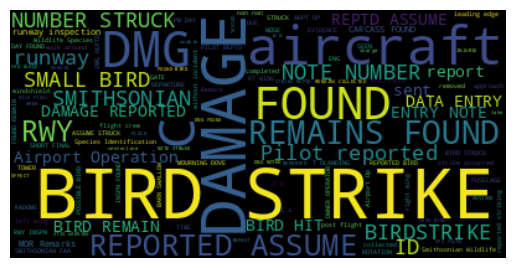

In [ ]:
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")

Comment: Words like strike, aircraft, damage were most common in the remarks.

In [ ]:
stopwords = set(STOPWORDS)
stopwords.add("strike")
stopwords.add("damage")
stopwords.add("aircraft")
stopwords.add("found")
stopwords.add("reported")
stopwords.add("remain")
stopwords.add("remains")
stopwords.add("bird")

(-0.5, 399.5, 199.5, -0.5)

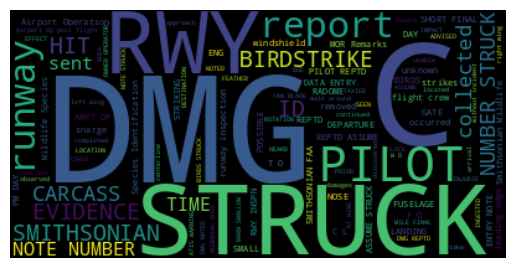

In [ ]:
wc = WordCloud(stopwords=stopwords).generate(remarks)
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")

## X (Damage) vs y (Damage level): Classification:

### Remove DAMAGE LEVEL Unknown

In [15]:
df_new = df[df['DAMAGE_LEVEL'].notna()]

Comment: Removed Damage Level Unknown/blank/Null values

In [16]:
df_new = df_new[df_new.DAMAGE_LEVEL != 'N']

In [17]:
df_new.DAMAGE_LEVEL.value_counts(dropna=False)

M     8564
M?    6763
S     4250
D       82
Name: DAMAGE_LEVEL, dtype: int64

In [18]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19659 entries, 4 to 285504
Columns: 101 entries, Unnamed: 0 to TRANSFER
dtypes: bool(37), float64(21), int64(4), object(39)
memory usage: 10.4+ MB


In [19]:
#df_new[df_new['DAMAGE_LEVEL'] == 'N'].loc[:, ['COST_REPAIRS', 'COST_OTHER']].value_counts(dropna=False)

Comment: Notice that Damage Level N has some cost associated in Cost Repairs Column, which is inaccurate, so replace it with 0

In [20]:
#df_new.loc[(df['DAMAGE_LEVEL'] == 'N'), 'COST_REPAIRS'] = 0

In [21]:
#df_new[df_new['DAMAGE_LEVEL'] == 'N'].loc[:, ['COST_REPAIRS', 'COST_OTHER']].value_counts(dropna=False)

### Filter X (Damage related columns)

In [22]:
df_new.INDICATED_DAMAGE.value_counts(dropna=False)

True    19659
Name: INDICATED_DAMAGE, dtype: int64

In [23]:
X = df_new.loc[:, damage_columns[2:]]
X.head()

,STR_RAD,DAM_RAD,STR_WINDSHLD,DAM_WINDSHLD,STR_NOSE,DAM_NOSE,STR_ENG1,DAM_ENG1,ING_ENG1,STR_ENG2,DAM_ENG2,ING_ENG2,STR_ENG3,DAM_ENG3,ING_ENG3,STR_ENG4,DAM_ENG4,ING_ENG4,STR_PROP,DAM_PROP,STR_WING_ROT,DAM_WING_ROT,STR_FUSE,DAM_FUSE,STR_LG,DAM_LG,STR_TAIL,DAM_TAIL,STR_LGHTS,DAM_LGHTS,STR_OTHER,DAM_OTHER,OTHER_SPECIFY,INGESTED_OTHER
4,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,NaN,True
6,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,True,True,True,False,False,False,False,False,False,False,False,True,False,NaN,False
10,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,NaN,False
18,False,False,False,False,False,False,True,True,False,True,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,NaN,True
24,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,True,True,False,False,True,True,Flap,False


Comment: This is accurate as the Damage Level N has no indicated damage

### Filter y (DAMAGE_LEVEL)

In [ ]:
y = df_new["DAMAGE_LEVEL"]

In [ ]:
y.info()

<class 'pandas.core.series.Series'>
Int64Index: 19659 entries, 4 to 285504
Series name: DAMAGE_LEVEL
Non-Null Count  Dtype 
--------------  ----- 
19659 non-null  object
dtypes: object(1)
memory usage: 307.2+ KB


### EDA

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19659 entries, 4 to 285504
Data columns (total 34 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   STR_RAD         19659 non-null  bool  
 1   DAM_RAD         19659 non-null  bool  
 2   STR_WINDSHLD    19659 non-null  bool  
 3   DAM_WINDSHLD    19659 non-null  bool  
 4   STR_NOSE        19659 non-null  bool  
 5   DAM_NOSE        19659 non-null  bool  
 6   STR_ENG1        19659 non-null  bool  
 7   DAM_ENG1        19659 non-null  bool  
 8   ING_ENG1        19659 non-null  bool  
 9   STR_ENG2        19659 non-null  bool  
 10  DAM_ENG2        19659 non-null  bool  
 11  ING_ENG2        19659 non-null  bool  
 12  STR_ENG3        19659 non-null  bool  
 13  DAM_ENG3        19659 non-null  bool  
 14  ING_ENG3        19659 non-null  bool  
 15  STR_ENG4        19659 non-null  bool  
 16  DAM_ENG4        19659 non-null  bool  
 17  ING_ENG4        19659 non-null  bool  
 18  STR_P

Comments: All the X variables are of boolean type except Other Specify which is a string type

In [ ]:
X.OTHER_SPECIFY.str.lower().sort_values().value_counts(dropna=False)

NaN                   17249
pitot tube              258
part not reptd          251
antenna                  74
cowling                  65
                      ...  
exhaust, cowling          1
ext fuel tank             1
external fuel tank        1
f/o aoa vane              1
internal sunscreen        1
Name: OTHER_SPECIFY, Length: 924, dtype: int64

Comment: There are **90%+** null values in the other specify column where user enters text regarding damage. Most common comments mentioned by the users are *engine cowling* and *part not reported*

In [ ]:
X = X.drop("OTHER_SPECIFY", axis=1)

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19659 entries, 4 to 285504
Data columns (total 33 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   STR_RAD         19659 non-null  bool 
 1   DAM_RAD         19659 non-null  bool 
 2   STR_WINDSHLD    19659 non-null  bool 
 3   DAM_WINDSHLD    19659 non-null  bool 
 4   STR_NOSE        19659 non-null  bool 
 5   DAM_NOSE        19659 non-null  bool 
 6   STR_ENG1        19659 non-null  bool 
 7   DAM_ENG1        19659 non-null  bool 
 8   ING_ENG1        19659 non-null  bool 
 9   STR_ENG2        19659 non-null  bool 
 10  DAM_ENG2        19659 non-null  bool 
 11  ING_ENG2        19659 non-null  bool 
 12  STR_ENG3        19659 non-null  bool 
 13  DAM_ENG3        19659 non-null  bool 
 14  ING_ENG3        19659 non-null  bool 
 15  STR_ENG4        19659 non-null  bool 
 16  DAM_ENG4        19659 non-null  bool 
 17  ING_ENG4        19659 non-null  bool 
 18  STR_PROP        19659 non

Comment: All of the independent variables are boolean type.

### Handle missing values

Comment: Since all independent variables are boolean, there might not be a need for further encoding. Boolean variables can typically be used directly in machine learning models.

In [ ]:
y.value_counts(dropna=False)

M     8564
M?    6763
S     4250
D       82
Name: DAMAGE_LEVEL, dtype: int64

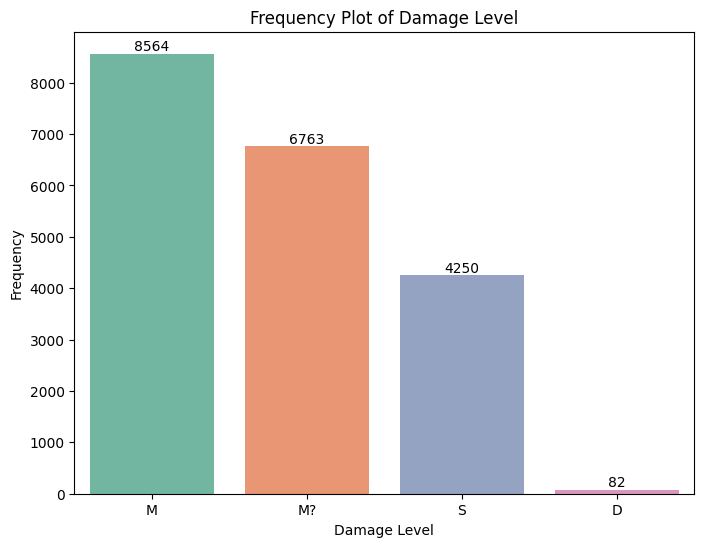

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a count plot using Seaborn
plt.figure(figsize=(8, 6))
ax = sns.barplot(data=y.value_counts(dropna=False).reset_index(), y='DAMAGE_LEVEL', x='index', palette='Set2')
plt.xlabel('Damage Level')
plt.ylabel('Frequency')
plt.title('Frequency Plot of Damage Level')

# Add labels to the bars
for index, row in y.value_counts(dropna=False).reset_index().iterrows():
    ax.text(row.name, row.DAMAGE_LEVEL, f'{row.DAMAGE_LEVEL}', ha='center', va='bottom')

plt.show()

### Encoding Categorical Variables

As the Damage levels are related, we can combine Minor and Minor Undetermined as "Minor". Similarly substantial and Destructive as "Substantial". Manually encoding the "damage level" variable based on the provided descriptions:

"N" (None) -> 0    
"M" (Minor) -> 1   
"S" (Substantial) -> 2    
By manually encoding the variable, we ensure that the numerical representation aligns perfectly with the meaning of each category, as defined in the descriptions. This encoding will make it easier for the machine learning model to understand the relationship between the "damage level" and other features in the dataset.

In [ ]:
#y.replace("N", 0, inplace=True)
y.replace("M", 0, inplace=True)
y.replace("M?", 0, inplace=True)
y.replace("S", 1, inplace=True)
y.replace("D", 1, inplace=True)

In [ ]:
y.value_counts(dropna=False)

0    15327
1     4332
Name: DAMAGE_LEVEL, dtype: int64

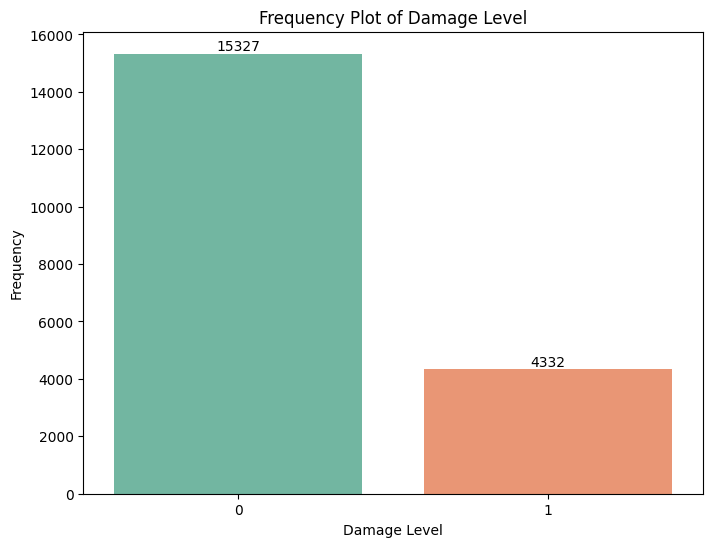

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a count plot using Seaborn
plt.figure(figsize=(8, 6))
ax = sns.barplot(data=y.value_counts(dropna=False).reset_index(), y='DAMAGE_LEVEL', x='index', palette='Set2')
plt.xlabel('Damage Level')
plt.ylabel('Frequency')
plt.title('Frequency Plot of Damage Level')

# Add labels to the bars
for index, row in y.value_counts(dropna=False).reset_index().iterrows():
    ax.text(row.name, row.DAMAGE_LEVEL, f'{row.DAMAGE_LEVEL}', ha='center', va='bottom')

plt.show()

### Load model

In [ ]:
# load the model from disk
filename = "oversample-majority.sav"
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X_selected, y)
print(result)

0.6461799438898675


In [ ]:
# Assuming X_test is your test data and y_true are the true labels
y_pred = loaded_model.predict(X_selected)

# Generate the classification report
report = classification_report(y, y_pred)

In [ ]:
print(report)

              precision    recall  f1-score   support

           0       0.64      0.68      0.66     15327
           1       0.66      0.62      0.64     15327

    accuracy                           0.65     30654
   macro avg       0.65      0.65      0.65     30654
weighted avg       0.65      0.65      0.65     30654



### Feature Selection

Comment: In this case, we have 34 independent boolean variables, and we want to predict the "damage level" based on these features. Feature selection becomes important to identify which of these boolean variables are most relevant for predicting the "damage level." Given that the features are all boolean, the selection process can be straightforward.

#### Method 1: Univariate Feature Selection:

Comment: Methods like chi-squared, mutual information, and ANOVA can be used to evaluate the statistical relationship between each feature and the target variable. Features with the highest scores are selected.

Chi-sq test

In [ ]:
from sklearn.feature_selection import SelectKBest, chi2

k= 10 # adjust as needed
# Assuming you used SelectKBest for feature selection
selector = SelectKBest(score_func=chi2, k=k)  # Replace 'k' with your selected value
X_new = selector.fit_transform(X, y)

selected_indices = selector.get_support(indices=True)
# Assuming 'column_names' is a list of original column names
selected_column_names = [X.columns.tolist()[i] for i in selected_indices]

In [ ]:
X_new.shape

(19659, 10)

In [ ]:
selected_column_names

['DAM_WINDSHLD',
 'STR_ENG1',
 'DAM_ENG1',
 'STR_ENG2',
 'DAM_ENG2',
 'STR_ENG3',
 'DAM_ENG3',
 'DAM_PROP',
 'STR_WING_ROT',
 'INGESTED_OTHER']

Comment: Find optimal k value using feature importance scores

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

# Define a range of k values to try
k_values = range(1, 34, 1)

# Initialize variables to keep track of the best k and its corresponding score
best_k = None
best_score = 0  # Initialize with a low value for maximization

d = {}

for k in k_values:
    # Select the top k features using the chi-squared test
    selector = SelectKBest(score_func=chi2, k=k)
    X_new = selector.fit_transform(X, y)

    selected_indices = selector.get_support(indices=True)
    # Assuming 'column_names' is a list of original column names
    selected_column_names = [X.columns.tolist()[i] for i in selected_indices]

    # Calculate the cumulative importance of the selected features
    cumulative_importance = sum(selector.scores_[:k])

    # adding {k-value: [k-score, selected_columns]} to d
    d[k] = [cumulative_importance, selected_column_names]

    # Check if this k value has a better cumulative importance
    if cumulative_importance > best_score:
        best_score = cumulative_importance
        best_k = k

print(f"Best k value: {best_k}")
print(f"Best cumulative importance score: {best_score}")


Best k value: 33
Best cumulative importance score: 7595.0733229850475


In [ ]:
print(d)

{1: [63.08938123908354, ['INGESTED_OTHER']], 2: [141.41094455101728, ['DAM_ENG1', 'INGESTED_OTHER']], 3: [249.54665250176265, ['DAM_ENG1', 'DAM_ENG2', 'INGESTED_OTHER']], 4: [502.35164480586513, ['STR_ENG1', 'DAM_ENG1', 'DAM_ENG2', 'INGESTED_OTHER']], 5: [523.8778309188227, ['STR_ENG1', 'DAM_ENG1', 'STR_ENG2', 'DAM_ENG2', 'INGESTED_OTHER']], 6: [534.8387149165101, ['DAM_WINDSHLD', 'STR_ENG1', 'DAM_ENG1', 'STR_ENG2', 'DAM_ENG2', 'INGESTED_OTHER']], 7: [1330.8002074127794, ['DAM_WINDSHLD', 'STR_ENG1', 'DAM_ENG1', 'STR_ENG2', 'DAM_ENG2', 'DAM_PROP', 'INGESTED_OTHER']], 8: [2437.6932002142435, ['DAM_WINDSHLD', 'STR_ENG1', 'DAM_ENG1', 'STR_ENG2', 'DAM_ENG2', 'DAM_PROP', 'STR_WING_ROT', 'INGESTED_OTHER']], 9: [2440.061124135212, ['DAM_WINDSHLD', 'STR_ENG1', 'DAM_ENG1', 'STR_ENG2', 'DAM_ENG2', 'DAM_ENG3', 'DAM_PROP', 'STR_WING_ROT', 'INGESTED_OTHER']], 10: [3088.951794986212, ['DAM_WINDSHLD', 'STR_ENG1', 'DAM_ENG1', 'STR_ENG2', 'DAM_ENG2', 'STR_ENG3', 'DAM_ENG3', 'DAM_PROP', 'STR_WING_ROT', '

Comment: The optimal k = 14. We will consider k =13 since the importance score doesn't have much difference.     

k = 13     
importance score = 31298.882087187147,     
Selected columns =
['DAMAGE_LEVEL',
   'DAM_RAD',
   'STR_WINDSHLD',
   'DAM_WINDSHLD',
   'STR_NOSE',
   'DAM_NOSE',
   'DAM_ENG1',
   'DAM_ENG2',
   'STR_WING_ROT',
   'STR_LGHTS',
   'DAM_LGHTS',
   'STR_OTHER']

In [ ]:
###Train and Test split
cols = ['DAM_RAD', 'STR_WINDSHLD', 'DAM_WINDSHLD', 'STR_NOSE', 'DAM_NOSE', 'DAM_ENG1', 'DAM_ENG2', 'STR_WING_ROT', 'DAM_WING_ROT', 'STR_FUSE', 'DAM_LGHTS', 'DAM_OTHER']
X1 = X.loc[:, cols]
X1.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 19659 entries, 4 to 285504
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   DAM_RAD       19659 non-null  bool 
 1   STR_WINDSHLD  19659 non-null  bool 
 2   DAM_WINDSHLD  19659 non-null  bool 
 3   STR_NOSE      19659 non-null  bool 
 4   DAM_NOSE      19659 non-null  bool 
 5   DAM_ENG1      19659 non-null  bool 
 6   DAM_ENG2      19659 non-null  bool 
 7   STR_WING_ROT  19659 non-null  bool 
 8   DAM_WING_ROT  19659 non-null  bool 
 9   STR_FUSE      19659 non-null  bool 
 10  DAM_LGHTS     19659 non-null  bool 
 11  DAM_OTHER     19659 non-null  bool 
dtypes: bool(12)
memory usage: 384.0 KB


In [ ]:
y.value_counts()

0    15327
1     4332
Name: DAMAGE_LEVEL, dtype: int64

In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit

# Initialize the StratifiedShuffleSplit with the desired split ratio
splitter = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

# Split the data into train and test sets while maintaining the distribution
for train_index, test_index in splitter.split(X1, y):
    X_train, X_test = X1.iloc[train_index], X1.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

# Check the distribution of "DAMAGE_LEVEL" in both sets
train_distribution = y_train.value_counts().sort_index()
test_distribution = y_test.value_counts().sort_index()

print("Train Set Distribution:")
print(train_distribution)

print("\nTest Set Distribution:")
print(test_distribution)

Train Set Distribution:
0    12261
1     3466
Name: DAMAGE_LEVEL, dtype: int64

Test Set Distribution:
0    3066
1     866
Name: DAMAGE_LEVEL, dtype: int64


In [ ]:
#### Model Fitting

from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [ ]:
# Create a list of candidate models
models = [
    ('Logistic Regression', LogisticRegression(solver='liblinear',multi_class='ovr')),
    ('Random Forest', RandomForestClassifier(n_estimators=100, random_state=42)),
    ('Gradient Boosting', GradientBoostingClassifier(n_estimators=100, random_state=42)),
    ('Support Vector Machine', SVC(kernel='linear', decision_function_shape='ovr', C=1))
]

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

In [ ]:
# Evaluate and compare models
results = []
for name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    confusion = confusion_matrix(y_test, y_pred)

    results.append({
        'Model': name,
        'Accuracy': accuracy,
        'Classification Report': report,
        'Confusion Matrix': confusion
    })

##### Results

In [ ]:
for i in results:
  print(i["Model"])
  print(i["Classification Report"])

Logistic Regression
              precision    recall  f1-score   support

           0       0.79      0.98      0.88      3066
           1       0.62      0.09      0.15       866

    accuracy                           0.79      3932
   macro avg       0.70      0.54      0.51      3932
weighted avg       0.75      0.79      0.72      3932

Random Forest
              precision    recall  f1-score   support

           0       0.79      0.99      0.88      3066
           1       0.63      0.08      0.15       866

    accuracy                           0.79      3932
   macro avg       0.71      0.54      0.51      3932
weighted avg       0.76      0.79      0.72      3932

Gradient Boosting
              precision    recall  f1-score   support

           0       0.79      0.99      0.88      3066
           1       0.63      0.08      0.14       866

    accuracy                           0.79      3932
   macro avg       0.71      0.53      0.51      3932
weighted avg       0.7

#### Method 2: Feature Importance from Tree-Based Models

In [ ]:
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

# Define a range of k values to try
k_values = range(1, 34, 1)

# Initialize variables to keep track of the best k and its corresponding score
best_k = None
best_score = 0  # Initialize with a low value for maximization

d = {}

# Loop through different k values
for k in k_values:
    # Select top k features
    selector = SelectKBest(score_func=chi2, k=k)
    X_new = selector.fit_transform(X, y)
    selected_indices = selector.get_support(indices=True)
    # Assuming 'column_names' is a list of original column names
    selected_column_names = [X.columns.tolist()[i] for i in selected_indices]

    # Initialize and train a machine learning model (e.g., RandomForest)
    model = RandomForestClassifier()

    # Calculate the cross-validated score (e.g., accuracy)
    scores = cross_val_score(model, X_new, y, cv=5)  # 5-fold cross-validation
    mean_score = scores.mean()

    # adding {k-value, k-score} to d
    d[k] = [mean_score, selected_column_names]

    # Check if this k value has a better score
    if mean_score > best_score:
        best_score = mean_score
        best_k = k

print(f"Best k value: {best_k}")
print(f"Best cross-validated score: {best_score}")


Best k value: 11
Best cross-validated score: 0.8106213929862871


In [ ]:
d

{1: [0.7910884554081817, ['INGESTED_OTHER']],
 2: [0.7895622168055105, ['DAM_ENG1', 'INGESTED_OTHER']],
 3: [0.8032454421683501, ['DAM_ENG1', 'DAM_ENG2', 'INGESTED_OTHER']],
 4: [0.804415459659803,
  ['STR_ENG1', 'DAM_ENG1', 'DAM_ENG2', 'INGESTED_OTHER']],
 5: [0.8017196046864361,
  ['STR_ENG1', 'DAM_ENG1', 'STR_ENG2', 'DAM_ENG2', 'INGESTED_OTHER']],
 6: [0.8020756705251033,
  ['DAM_WINDSHLD',
   'STR_ENG1',
   'DAM_ENG1',
   'STR_ENG2',
   'DAM_ENG2',
   'INGESTED_OTHER']],
 7: [0.8039577291182356,
  ['DAM_WINDSHLD',
   'STR_ENG1',
   'DAM_ENG1',
   'STR_ENG2',
   'DAM_ENG2',
   'DAM_PROP',
   'INGESTED_OTHER']],
 8: [0.8021262634980371,
  ['DAM_WINDSHLD',
   'STR_ENG1',
   'DAM_ENG1',
   'STR_ENG2',
   'DAM_ENG2',
   'DAM_PROP',
   'STR_WING_ROT',
   'INGESTED_OTHER']],
 9: [0.8061956853381048,
  ['DAM_WINDSHLD',
   'STR_ENG1',
   'DAM_ENG1',
   'STR_ENG2',
   'DAM_ENG2',
   'DAM_ENG3',
   'DAM_PROP',
   'STR_WING_ROT',
   'INGESTED_OTHER']],
 10: [0.8067044487915009,
  ['DAM_WINDSHL

Comment: From this approach, we will select the following:     
k = 26 features    
cross-validation score = 0.8991640462385873,      
selected columns =
  ['INDICATED_DAMAGE',
   'STR_RAD',
   'DAM_RAD',
   'STR_WINDSHLD',
   'DAM_WINDSHLD',
   'STR_NOSE',
   'DAM_NOSE',
   'STR_ENG1',
   'DAM_ENG1',
   'ING_ENG1',
   'STR_ENG2',
   'DAM_ENG2',
   'ING_ENG2',
   'STR_PROP',
   'DAM_PROP',
   'STR_WING_ROT',
   'DAM_WING_ROT',
   'STR_FUSE',
   'DAM_FUSE',
   'STR_LG',
   'DAM_LG',
   'STR_TAIL',
   'DAM_TAIL',
   'STR_LGHTS',
   'DAM_LGHTS',
   'DAM_OTHER']

Comment: Tree-based models like decision trees and random forests can provide feature importance scores. You can use these scores to select the most important features.

In [ ]:
###Train and Test split
cols = ['STR_RAD',
   'DAM_RAD',
   'STR_WINDSHLD',
   'DAM_WINDSHLD',
   'STR_NOSE',
   'DAM_NOSE',
   'STR_ENG1',
   'DAM_ENG1',
   'ING_ENG1',
   'STR_ENG2',
   'DAM_ENG2',
   'ING_ENG2',
   'STR_PROP',
   'DAM_PROP',
   'STR_WING_ROT',
   'DAM_WING_ROT',
   'STR_FUSE',
   'DAM_FUSE',
   'STR_LG',
   'DAM_LG',
   'STR_TAIL',
   'DAM_TAIL',
   'STR_LGHTS',
   'DAM_LGHTS',
   'DAM_OTHER']
X2 = X.loc[:, cols]
X2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19659 entries, 4 to 285504
Data columns (total 25 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   STR_RAD       19659 non-null  bool 
 1   DAM_RAD       19659 non-null  bool 
 2   STR_WINDSHLD  19659 non-null  bool 
 3   DAM_WINDSHLD  19659 non-null  bool 
 4   STR_NOSE      19659 non-null  bool 
 5   DAM_NOSE      19659 non-null  bool 
 6   STR_ENG1      19659 non-null  bool 
 7   DAM_ENG1      19659 non-null  bool 
 8   ING_ENG1      19659 non-null  bool 
 9   STR_ENG2      19659 non-null  bool 
 10  DAM_ENG2      19659 non-null  bool 
 11  ING_ENG2      19659 non-null  bool 
 12  STR_PROP      19659 non-null  bool 
 13  DAM_PROP      19659 non-null  bool 
 14  STR_WING_ROT  19659 non-null  bool 
 15  DAM_WING_ROT  19659 non-null  bool 
 16  STR_FUSE      19659 non-null  bool 
 17  DAM_FUSE      19659 non-null  bool 
 18  STR_LG        19659 non-null  bool 
 19  DAM_LG        19659 non-

In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit

# Initialize the StratifiedShuffleSplit with the desired split ratio
splitter = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

# Split the data into train and test sets while maintaining the distribution
for train_index, test_index in splitter.split(X2, y):
    X_train, X_test = X2.iloc[train_index], X2.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

# Check the distribution of "DAMAGE_LEVEL" in both sets
train_distribution = y_train.value_counts().sort_index()
test_distribution = y_test.value_counts().sort_index()

print("Train Set Distribution:")
print(train_distribution)

print("\nTest Set Distribution:")
print(test_distribution)

Train Set Distribution:
0    12261
1     3466
Name: DAMAGE_LEVEL, dtype: int64

Test Set Distribution:
0    3066
1     866
Name: DAMAGE_LEVEL, dtype: int64


In [ ]:
y.value_counts()

0    15327
1     4332
Name: DAMAGE_LEVEL, dtype: int64

In [ ]:
#### Model Fitting

from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [ ]:
# Create and fit the ordinal logistic regression model
# You can specify your formula, which relates features to the ordinal response variable
formula = "DAMAGE_LEVEL ~ STR_RAD + DAM_RAD + STR_WINDSHLD \
+ DAM_WINDSHLD + STR_NOSE + DAM_NOSE + STR_ENG1 + DAM_ENG1' + STR_ENG2 + DAM_ENG2 \
+ STR_WING_ROT + DAM_WING_ROT + STR_FUSE + DAM_FUSE + STR_LG + DAM_LG + DAM_TAIL \
+ STR_LGHTS + DAM_LGHTS + DAM_OTHER"

In [ ]:
# Create a list of candidate models
'''
models = [
    ('Logistic Regression', smf.mnlogit(formula, data=pd.DataFrame({'DAMAGE_LEVEL': y_train,
                                                                    'INDICATED_DAMAGE': X_train.loc[:, 'INDICATED_DAMAGE'],
                                                                    'STR_RAD': X_train.loc[:, 'STR_RAD'],
                                                                    'DAM_RAD': X_train.loc[:, 'DAM_RAD'],
                                                                    'STR_WINDSHLD': X_train.loc[:, 'STR_WINDSHLD'],
                                                                    'DAM_WINDSHLD': X_train.loc[:, 'DAM_WINDSHLD'],
                                                                    'STR_NOSE': X_train.loc[:, 'STR_NOSE'],
                                                                    'DAM_NOSE': X_train.loc[:, 'DAM_NOSE'],
                                                                    'STR_ENG1': X_train.loc[:, 'STR_ENG1'],
                                                                    'DAM_ENG1': X_train.loc[:, 'DAM_ENG1'],
                                                                    'STR_ENG2': X_train.loc[:, 'STR_ENG2'],
                                                                    'DAM_ENG2': X_train.loc[:, 'DAM_ENG2'],
                                                                    'STR_WING_ROT': X_train.loc[:, 'STR_WING_ROT'],
                                                                    'DAM_WING_ROT': X_train.loc[:, 'DAM_WING_ROT'],
                                                                    'STR_FUSE': X_train.loc[:, 'STR_FUSE'],
                                                                    'DAM_FUSE': X_train.loc[:, 'DAM_FUSE'],
                                                                    'STR_LG': X_train.loc[:, 'STR_LG'],
                                                                    'DAM_LG': X_train.loc[:, 'DAM_LG'],
                                                                    'DAM_TAIL': X_train.loc[:, 'DAM_TAIL'],
                                                                    'STR_LGHTS': X_train.loc[:, 'STR_LGHTS'],
                                                                    'DAM_LGHTS': X_train.loc[:, 'DAM_LGHTS'],
                                                                    'DAM_OTHER': X_train.loc[:, 'DAM_OTHER']
                                                                    }))),
    ('Random Forest', RandomForestClassifier(n_estimators=100, random_state=42)),
    ('Gradient Boosting', GradientBoostingClassifier(n_estimators=100, random_state=42)),
    ('Support Vector Machine', SVC(kernel='linear', decision_function_shape='ovr', C=1))
]
'''

"\nmodels = [\n    ('Logistic Regression', smf.mnlogit(formula, data=pd.DataFrame({'DAMAGE_LEVEL': y_train,\n                                                                    'INDICATED_DAMAGE': X_train.loc[:, 'INDICATED_DAMAGE'],\n                                                                    'STR_RAD': X_train.loc[:, 'STR_RAD'],\n                                                                    'DAM_RAD': X_train.loc[:, 'DAM_RAD'],\n                                                                    'STR_WINDSHLD': X_train.loc[:, 'STR_WINDSHLD'],\n                                                                    'DAM_WINDSHLD': X_train.loc[:, 'DAM_WINDSHLD'],\n                                                                    'STR_NOSE': X_train.loc[:, 'STR_NOSE'],\n                                                                    'DAM_NOSE': X_train.loc[:, 'DAM_NOSE'],\n                                                                    'STR_ENG1': X_train.loc[:, 'STR_

In [ ]:
# Create a list of candidate models
models = [
    ('Logistic Regression', LogisticRegression(solver='liblinear',multi_class='ovr')),
    ('Random Forest', RandomForestClassifier(n_estimators=100, random_state=42)),
    ('Gradient Boosting', GradientBoostingClassifier(n_estimators=100, random_state=42)),
    ('Support Vector Machine', SVC(kernel='linear', decision_function_shape='ovr', C=1))
]

In [ ]:
# Evaluate and compare models
results = []
for name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    confusion = confusion_matrix(y_test, y_pred)

    results.append({
        'Model': name,
        'Accuracy': accuracy,
        'Classification Report': report,
        'Confusion Matrix': confusion
    })

##### Results

In [ ]:
for i in results:
  print(i["Model"])
  print(i["Classification Report"])

Logistic Regression
              precision    recall  f1-score   support

           0       0.80      0.97      0.88      3066
           1       0.56      0.13      0.21       866

    accuracy                           0.79      3932
   macro avg       0.68      0.55      0.54      3932
weighted avg       0.75      0.79      0.73      3932

Random Forest
              precision    recall  f1-score   support

           0       0.80      0.97      0.88      3066
           1       0.59      0.17      0.26       866

    accuracy                           0.79      3932
   macro avg       0.70      0.57      0.57      3932
weighted avg       0.76      0.79      0.74      3932

Gradient Boosting
              precision    recall  f1-score   support

           0       0.80      0.98      0.88      3066
           1       0.66      0.13      0.21       866

    accuracy                           0.79      3932
   macro avg       0.73      0.55      0.55      3932
weighted avg       0.7

##### Best Model

Random Forest    
precision  |  recall | f1-score  |  support


           0       0.98      0.83      0.90      1859
           1       0.33      0.08      0.13        12
           2       0.85      0.97      0.91       109
           3       0.50      0.11      0.18         9
           5       0.82      0.98      0.89      1457

    accuracy                           0.90      3446   
   macro avg       0.70      0.60      0.60      3446   
weighted avg       0.91      0.90      0.89      3446

#### Method 3: Recursive Feature Elimination (RFE)

Comment: RFE is an iterative method that starts with all features and eliminates the least important ones in each iteration, based on a model's performance. It continues until the desired number of features is reached.

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier  # You can use a different classifier if needed

# Define your machine learning model, e.g., RandomForestClassifier
model = RandomForestClassifier()

# Specify the number of features to select (optional, you can omit this)
# n_features_to_select = 10  # Adjust as needed

# Create the RFE model
# rfe = RFE(model, n_features_to_select=n_features_to_select)
rfe = RFE(model)

# Fit RFE to your data
X_new = rfe.fit_transform(X, y)

# Get the ranking of features, with 1 being the most important
feature_ranking = rfe.ranking_

# Get the support mask (True for selected features, False for eliminated features)
support_mask = rfe.support_


In [ ]:
selected_indices = rfe.get_support(indices=True)
# Assuming 'column_names' is a list of original column names
selected_column_names = [X.columns.tolist()[i] for i in selected_indices]
selected_column_names

['STR_RAD',
 'STR_WINDSHLD',
 'DAM_WINDSHLD',
 'STR_NOSE',
 'STR_ENG1',
 'DAM_ENG1',
 'STR_ENG2',
 'DAM_ENG2',
 'DAM_PROP',
 'STR_WING_ROT',
 'DAM_WING_ROT',
 'STR_FUSE',
 'DAM_FUSE',
 'DAM_LG',
 'STR_OTHER',
 'INGESTED_OTHER']

In [ ]:
rfe.get_support()

array([ True, False,  True,  True,  True, False,  True,  True, False,
        True,  True, False, False, False, False, False, False, False,
       False,  True,  True,  True,  True,  True, False,  True, False,
       False, False, False,  True, False,  True])

In [ ]:
# 'X' is a list of original column names
selected_column_names = [X.columns.tolist()[i] for i, support in enumerate(support_mask) if support]

print(f"Selected column names: {selected_column_names}")

Selected column names: ['STR_RAD', 'STR_WINDSHLD', 'DAM_WINDSHLD', 'STR_NOSE', 'STR_ENG1', 'DAM_ENG1', 'STR_ENG2', 'DAM_ENG2', 'DAM_PROP', 'STR_WING_ROT', 'DAM_WING_ROT', 'STR_FUSE', 'DAM_FUSE', 'DAM_LG', 'STR_OTHER', 'INGESTED_OTHER']


In [ ]:
len(selected_column_names)

16

Comment: RFE has selected 17 features. They are:     
 ['INDICATED_DAMAGE',
 'STR_RAD',
 'STR_WINDSHLD',
 'STR_NOSE',
 'STR_ENG1',
 'ING_ENG1',
 'STR_ENG2',
 'ING_ENG2',
 'STR_PROP',
 'STR_WING_ROT',
 'DAM_WING_ROT',
 'STR_FUSE',
 'STR_LG',
 'STR_TAIL',
 'STR_LGHTS',
 'STR_OTHER',
 'DAM_OTHER']

In [ ]:
feature_ranking

array([ 1,  9,  1,  1,  1,  5,  1,  1, 16,  1,  1, 14, 10, 11, 17, 13, 15,
       18,  6,  1,  1,  1,  1,  1,  2,  1,  7,  3,  8, 12,  1,  4,  1])

Comment: Features are ranked from 1 to the total number of features. A lower number indicates a higher feature importance. In this case, "1" is the highest-ranked feature, "2" is the second-highest ranked feature, and so on.

The features with a ranking of "1" are considered the most important features based on the RFE (Recursive Feature Elimination) process.

Features with higher rankings (e.g., "16," "15," "14," "17," "18") are considered less important and are likely to be eliminated if you set a specific number of features to select during the RFE process.

In [ ]:
support_mask

array([ True, False,  True,  True,  True, False,  True,  True, False,
        True,  True, False, False, False, False, False, False, False,
       False,  True,  True,  True,  True,  True, False,  True, False,
       False, False, False,  True, False,  True])

#### Method 4: L1 Regularization (Lasso)

Comment: L1 regularization adds a penalty term to the model's cost function for the absolute values of feature coefficients. This encourages the model to set some coefficients to exactly zero, effectively performing feature selection.

In [ ]:
from sklearn.linear_model import LogisticRegression

#  adjust the strength of the regularization with the C parameter (lower values indicate stronger regularization)
model = LogisticRegression(penalty='l1', solver='liblinear', C=1.0)

model.fit(X, y)

# access the feature coefficients to see which features are non-zero. Non-zero coefficients indicate selected features.
feature_coefficients = model.coef_[0]



In [ ]:
feature_coefficients

array([ 0.        ,  0.56334638, -0.01436526,  2.37117313, -0.07739883,
        0.38605816, -0.52206992,  1.77129854,  0.79423948, -0.38962274,
        1.61171705,  0.        ,  0.44727091,  1.09984175,  0.29516722,
        0.17583555,  1.68118358,  0.        ,  0.14822722,  1.53203376,
       -0.37717618,  1.16637331, -0.28348546,  1.07720578,  0.14042375,
        0.81672005, -0.18551818,  1.45471984,  0.        , -0.62221671,
       -0.71321548,  1.14849891,  1.94177017])

In [ ]:
selected_features = [X.columns.tolist()[i] for i, coef in enumerate(feature_coefficients) if coef != 0]
print("Selected features:")
print(selected_features)

Selected features:
['DAM_RAD', 'STR_WINDSHLD', 'DAM_WINDSHLD', 'STR_NOSE', 'DAM_NOSE', 'STR_ENG1', 'DAM_ENG1', 'ING_ENG1', 'STR_ENG2', 'DAM_ENG2', 'STR_ENG3', 'DAM_ENG3', 'ING_ENG3', 'STR_ENG4', 'DAM_ENG4', 'STR_PROP', 'DAM_PROP', 'STR_WING_ROT', 'DAM_WING_ROT', 'STR_FUSE', 'DAM_FUSE', 'STR_LG', 'DAM_LG', 'STR_TAIL', 'DAM_TAIL', 'DAM_LGHTS', 'STR_OTHER', 'DAM_OTHER', 'INGESTED_OTHER']


In [ ]:
len(selected_features)

29

Comment: 17 columns are selected using L1 regularization method.    
Features = ['INDICATED_DAMAGE', 'STR_RAD', 'STR_WINDSHLD', 'STR_NOSE', 'STR_ENG1', 'ING_ENG1', 'STR_ENG2', 'STR_ENG3', 'STR_ENG4', 'STR_PROP', 'STR_WING_ROT', 'STR_FUSE', 'STR_LG', 'STR_TAIL', 'STR_LGHTS', 'STR_OTHER', 'INGESTED_OTHER']

In [ ]:
###Train and Test split
cols = ['STR_RAD', 'STR_WINDSHLD', 'STR_NOSE', 'STR_ENG1', 'ING_ENG1', 'STR_ENG2', 'STR_ENG3', 'STR_ENG4', 'STR_PROP', 'STR_WING_ROT', 'STR_FUSE', 'STR_LG', 'STR_TAIL', 'STR_LGHTS', 'STR_OTHER', 'INGESTED_OTHER']
X4 = X.loc[:, cols]
X4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19659 entries, 4 to 285504
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   STR_RAD         19659 non-null  bool 
 1   STR_WINDSHLD    19659 non-null  bool 
 2   STR_NOSE        19659 non-null  bool 
 3   STR_ENG1        19659 non-null  bool 
 4   ING_ENG1        19659 non-null  bool 
 5   STR_ENG2        19659 non-null  bool 
 6   STR_ENG3        19659 non-null  bool 
 7   STR_ENG4        19659 non-null  bool 
 8   STR_PROP        19659 non-null  bool 
 9   STR_WING_ROT    19659 non-null  bool 
 10  STR_FUSE        19659 non-null  bool 
 11  STR_LG          19659 non-null  bool 
 12  STR_TAIL        19659 non-null  bool 
 13  STR_LGHTS       19659 non-null  bool 
 14  STR_OTHER       19659 non-null  bool 
 15  INGESTED_OTHER  19659 non-null  bool 
dtypes: bool(16)
memory usage: 460.8 KB


In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit

# Initialize the StratifiedShuffleSplit with the desired split ratio
splitter = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

# Split the data into train and test sets while maintaining the distribution
for train_index, test_index in splitter.split(X4, y):
    X_train, X_test = X4.iloc[train_index], X4.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

# Check the distribution of "DAMAGE_LEVEL" in both sets
train_distribution = y_train.value_counts().sort_index()
test_distribution = y_test.value_counts().sort_index()

print("Train Set Distribution:")
print(train_distribution)

print("\nTest Set Distribution:")
print(test_distribution)

Train Set Distribution:
0    12261
1     3466
Name: DAMAGE_LEVEL, dtype: int64

Test Set Distribution:
0    3066
1     866
Name: DAMAGE_LEVEL, dtype: int64


In [ ]:
# Evaluate and compare models
results = []
for name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    confusion = confusion_matrix(y_test, y_pred)

    results.append({
        'Model': name,
        'Accuracy': accuracy,
        'Classification Report': report,
        'Confusion Matrix': confusion
    })

##### Results

In [ ]:
for i in results:
  print(i["Model"])
  print(i["Classification Report"])

Logistic Regression
              precision    recall  f1-score   support

           0       0.86      0.89      0.88      3066
           1       0.57      0.48      0.52       866

    accuracy                           0.80      3932
   macro avg       0.71      0.69      0.70      3932
weighted avg       0.80      0.80      0.80      3932

Random Forest
              precision    recall  f1-score   support

           0       0.86      0.88      0.87      3066
           1       0.54      0.48      0.51       866

    accuracy                           0.80      3932
   macro avg       0.70      0.68      0.69      3932
weighted avg       0.79      0.80      0.79      3932

Gradient Boosting
              precision    recall  f1-score   support

           0       0.86      0.90      0.88      3066
           1       0.56      0.46      0.51       866

    accuracy                           0.80      3932
   macro avg       0.71      0.68      0.69      3932
weighted avg       0.7

##### Best Model


Gradient Boosting
              precision    recall  f1-score   support

           0       0.98      0.85      0.91      1859
           1       0.20      0.08      0.12        12
           2       0.86      0.95      0.90       109
           3       0.75      0.33      0.46         9
           5       0.83      0.98      0.90      1457

    accuracy                           0.90      3446
   macro avg       0.72      0.64      0.66      3446
weighted avg       0.91      0.90      0.90      3446


#### Method 5: Correlation Analysis

Comment: You can calculate the correlation between features and the target variable. Features with high correlation are more likely to be important.

In [ ]:
y.info()

<class 'pandas.core.series.Series'>
Int64Index: 19659 entries, 4 to 285504
Series name: DAMAGE_LEVEL
Non-Null Count  Dtype
--------------  -----
19659 non-null  int64
dtypes: int64(1)
memory usage: 307.2 KB


In [ ]:
import pandas as pd

# Assuming 'df' is your DataFrame with all variables including 'damage_level'
correlations = X.corrwith(y)

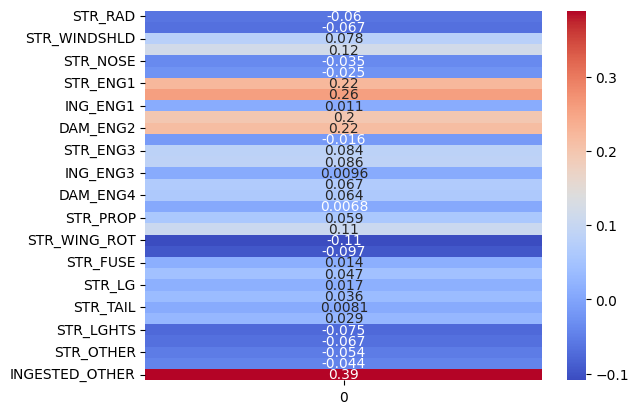

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(correlations.to_frame(), annot=True, cmap='coolwarm')
plt.show()


In [ ]:
correlations

STR_RAD          -0.06
DAM_RAD          -0.07
STR_WINDSHLD      0.08
DAM_WINDSHLD      0.12
STR_NOSE         -0.04
DAM_NOSE         -0.02
STR_ENG1          0.22
DAM_ENG1          0.26
ING_ENG1          0.01
STR_ENG2          0.20
DAM_ENG2          0.22
ING_ENG2         -0.02
STR_ENG3          0.08
DAM_ENG3          0.09
ING_ENG3          0.01
STR_ENG4          0.07
DAM_ENG4          0.06
ING_ENG4          0.01
STR_PROP          0.06
DAM_PROP          0.11
STR_WING_ROT     -0.11
DAM_WING_ROT     -0.10
STR_FUSE          0.01
DAM_FUSE          0.05
STR_LG            0.02
DAM_LG            0.04
STR_TAIL          0.01
DAM_TAIL          0.03
STR_LGHTS        -0.08
DAM_LGHTS        -0.07
STR_OTHER        -0.05
DAM_OTHER        -0.04
INGESTED_OTHER    0.39
dtype: float64

In [ ]:
threshold = 0.02  # Adjust the threshold as needed
selected_features = correlations[abs(correlations) >= threshold]
print(selected_features)


STR_RAD          -0.06
DAM_RAD          -0.07
STR_WINDSHLD      0.08
DAM_WINDSHLD      0.12
STR_NOSE         -0.04
DAM_NOSE         -0.02
STR_ENG1          0.22
DAM_ENG1          0.26
STR_ENG2          0.20
DAM_ENG2          0.22
STR_ENG3          0.08
DAM_ENG3          0.09
STR_ENG4          0.07
DAM_ENG4          0.06
STR_PROP          0.06
DAM_PROP          0.11
STR_WING_ROT     -0.11
DAM_WING_ROT     -0.10
DAM_FUSE          0.05
DAM_LG            0.04
DAM_TAIL          0.03
STR_LGHTS        -0.08
DAM_LGHTS        -0.07
STR_OTHER        -0.05
DAM_OTHER        -0.04
INGESTED_OTHER    0.39
dtype: float64


From Correlation Analysis, we found that 15 features are strongly correlated. They are:

INDICATED_DAMAGE   
STR_RAD            
STR_WINDSHLD       
STR_NOSE           
STR_ENG1           
ING_ENG1           
STR_ENG2           
ING_ENG2           
STR_PROP           
STR_WING_ROT       
STR_FUSE           
STR_LG            
STR_TAIL           
STR_LGHTS          
STR_OTHER

In [ ]:
###Train and Test split
cols = ['STR_RAD',
'STR_WINDSHLD',
'STR_NOSE',
'STR_ENG1',
'ING_ENG1',
'STR_ENG2',
'ING_ENG2',
'STR_PROP',
'STR_WING_ROT',
'STR_FUSE',
'STR_LG',
'STR_TAIL',
'STR_LGHTS',
'STR_OTHER']
X3 = X.loc[:, cols]
X3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19659 entries, 4 to 285504
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   STR_RAD       19659 non-null  bool 
 1   STR_WINDSHLD  19659 non-null  bool 
 2   STR_NOSE      19659 non-null  bool 
 3   STR_ENG1      19659 non-null  bool 
 4   ING_ENG1      19659 non-null  bool 
 5   STR_ENG2      19659 non-null  bool 
 6   ING_ENG2      19659 non-null  bool 
 7   STR_PROP      19659 non-null  bool 
 8   STR_WING_ROT  19659 non-null  bool 
 9   STR_FUSE      19659 non-null  bool 
 10  STR_LG        19659 non-null  bool 
 11  STR_TAIL      19659 non-null  bool 
 12  STR_LGHTS     19659 non-null  bool 
 13  STR_OTHER     19659 non-null  bool 
dtypes: bool(14)
memory usage: 422.4 KB


In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit

# Initialize the StratifiedShuffleSplit with the desired split ratio
splitter = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

# Split the data into train and test sets while maintaining the distribution
for train_index, test_index in splitter.split(X3, y):
    X_train, X_test = X3.iloc[train_index], X3.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

# Check the distribution of "DAMAGE_LEVEL" in both sets
train_distribution = y_train.value_counts().sort_index()
test_distribution = y_test.value_counts().sort_index()

print("Train Set Distribution:")
print(train_distribution)

print("\nTest Set Distribution:")
print(test_distribution)

Train Set Distribution:
0    12261
1     3466
Name: DAMAGE_LEVEL, dtype: int64

Test Set Distribution:
0    3066
1     866
Name: DAMAGE_LEVEL, dtype: int64


In [ ]:
# Evaluate and compare models
results = []
for name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    confusion = confusion_matrix(y_test, y_pred)

    results.append({
        'Model': name,
        'Accuracy': accuracy,
        'Classification Report': report,
        'Confusion Matrix': confusion
    })

##### Results

In [ ]:
for i in results:
  print(i["Model"])
  print(i["Classification Report"])

Logistic Regression
              precision    recall  f1-score   support

           0       0.79      0.98      0.87      3066
           1       0.46      0.07      0.12       866

    accuracy                           0.78      3932
   macro avg       0.62      0.52      0.49      3932
weighted avg       0.72      0.78      0.71      3932

Random Forest
              precision    recall  f1-score   support

           0       0.79      0.96      0.87      3066
           1       0.44      0.11      0.17       866

    accuracy                           0.77      3932
   macro avg       0.62      0.53      0.52      3932
weighted avg       0.72      0.77      0.72      3932

Gradient Boosting
              precision    recall  f1-score   support

           0       0.79      0.99      0.88      3066
           1       0.54      0.05      0.09       866

    accuracy                           0.78      3932
   macro avg       0.66      0.52      0.48      3932
weighted avg       0.7

##### Best Model

Gradient Boosting
              precision    recall  f1-score   support

           0       0.98      0.85      0.91      1859
           1       0.20      0.08      0.12        12
           2       0.86      0.95      0.90       109
           3       0.75      0.33      0.46         9
           5       0.83      0.98      0.90      1457

    accuracy                           0.90      3446
   macro avg       0.72      0.64      0.66      3446
weighted avg       0.91      0.90      0.90      3446


#### Method 6: Principal Component Analysis (PCA)

Comment: PCA is a dimensionality reduction technique that can be used to create linear combinations of features (principal components) that capture most of the data's variance. These components can be used as reduced features.

In [ ]:
import numpy as np
from sklearn.decomposition import PCA

# Create a PCA object
pca = PCA(n_components=2)

# Fit the data and transform it
data_pca = pca.fit_transform(X)



In [ ]:
# The transformed data contains the principal components
print("Original Data:\n", X)
print("Transformed Data (2 principal components):\n", data_pca)
print("Explained Variance Ratio:", pca.explained_variance_ratio_)

Original Data:
         STR_RAD  DAM_RAD  STR_WINDSHLD  DAM_WINDSHLD  STR_NOSE  DAM_NOSE  \
4         False    False         False         False     False     False   
6         False    False          True         False     False     False   
10        False    False         False         False     False     False   
18        False    False         False         False     False     False   
24        False    False         False         False     False     False   
...         ...      ...           ...           ...       ...       ...   
285275    False    False         False         False     False     False   
285341    False    False         False         False     False     False   
285442    False    False         False         False     False     False   
285490    False    False         False         False     False     False   
285504    False    False         False         False     False     False   

        STR_ENG1  DAM_ENG1  ING_ENG1  STR_ENG2  DAM_ENG2  ING_ENG2  STR

#### Method 7: Wrapper Methods

Comment: Wrapper methods involve using a specific machine learning model to evaluate different subsets of features and select the one that results in the best model performance. Examples include forward selection, backward elimination, and recursive feature addition.

#### Method 8: Embedded Methods

Comment: Some machine learning algorithms have built-in feature selection mechanisms. For example, linear models with L1 regularization (e.g., Lasso) perform feature selection during model training.

### Imbalanced Data in y

Comment: Check for class imbalance while considering the new descriptions. Some damage levels may be more common than others, and you should address this imbalance as necessary.

#### Oversampling the Minority Class M and S

In [ ]:
from imblearn.over_sampling import SMOTE

Comment: Here we are oversampling M and S levels. We will use Balanced Distribution technique. In balanced distribution, we would aim to have an equal number of samples for each class. To achieve this, we calculate the average number of samples for all classes and use that as the desired count.     
example: (7996 + 633 + 33) ÷ 3 = 2887 (approximately).     
Instead, we can also use, Target ratio. 2:3 ratio for M and a 1:3 ratio for S.

In [ ]:
# calculate the desired counts based on the ratios
m = y[(y == 0)].size
s = y[(y == 1)].size

balanced_dist = (m + s) / 3
desired_count_M = int((1/3) * balanced_dist) # Desired count for class M
desired_count_S = int((1/3) * balanced_dist) # Desired count for class S


In [ ]:
print(desired_count_M,",", desired_count_S)

2184 , 2184


Comment: Computed desired count of M and S

In [ ]:
from collections import Counter

In [ ]:
Counter(y)

Counter({0: 15327, 1: 4332})

Comment: Checking the class distribution before resampling

In [ ]:
# Convert boolean values to integers (0 and 1) if they are not already
X = X.astype(int)

In [ ]:
smote = SMOTE(random_state=42)
X, y = smote.fit_resample(X, y)

In [ ]:
Counter(y)

Counter({0: 15327, 1: 15327})

In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit

# Initialize the StratifiedShuffleSplit with the desired split ratio
splitter = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

# Split the data into train and test sets while maintaining the distribution
for train_index, test_index in splitter.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

# Check the distribution of "DAMAGE_LEVEL" in both sets
train_distribution = y_train.value_counts().sort_index()
test_distribution = y_test.value_counts().sort_index()

print("Train Set Distribution:")
print(train_distribution)

print("\nTest Set Distribution:")
print(test_distribution)



Train Set Distribution:
0    12261
1    12262
Name: DAMAGE_LEVEL, dtype: int64

Test Set Distribution:
0    3066
1    3065
Name: DAMAGE_LEVEL, dtype: int64


In [ ]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV


# Create a list of candidate models
models = [
    ('Logistic Regression', LogisticRegression(solver='liblinear',multi_class='ovr')),
    ('Random Forest', RandomForestClassifier(n_estimators=100, random_state=42)),
    ('Gradient Boosting', GradientBoostingClassifier(n_estimators=100, random_state=42)),
    ('Support Vector Machine', SVC(kernel='linear', decision_function_shape='ovr', C=1))
]

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

# Evaluate and compare models
results = []
for name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    confusion = confusion_matrix(y_test, y_pred)

    results.append({
        'Model': name,
        'Accuracy': accuracy,
        'Classification Report': report,
        'Confusion Matrix': confusion
    })


for i in results:
  print(i["Model"])
  print(i["Classification Report"])

Logistic Regression
              precision    recall  f1-score   support

           0       0.73      0.78      0.75      3066
           1       0.76      0.71      0.73      3065

    accuracy                           0.74      6131
   macro avg       0.75      0.74      0.74      6131
weighted avg       0.75      0.74      0.74      6131

Random Forest
              precision    recall  f1-score   support

           0       0.77      0.78      0.78      3066
           1       0.78      0.77      0.77      3065

    accuracy                           0.77      6131
   macro avg       0.77      0.77      0.77      6131
weighted avg       0.77      0.77      0.77      6131

Gradient Boosting
              precision    recall  f1-score   support

           0       0.74      0.79      0.76      3066
           1       0.77      0.72      0.75      3065

    accuracy                           0.75      6131
   macro avg       0.76      0.75      0.75      6131
weighted avg       0.7

#### Save model

In [ ]:
# Save Model Using Pickle
import pickle
model = GradientBoostingClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# save the model to disk
filename = 'oversample-majority.sav'
pickle.dump(model, open(filename, 'wb'))
print("Model is saved")

Model is saved


#### Undersampling the majority

##### Strategy = 'all'

In [ ]:
from imblearn.under_sampling import RandomUnderSampler

In [ ]:
undersampler = RandomUnderSampler(sampling_strategy='all', random_state=42)

In [ ]:
X_undersampled, y_undersampled = undersampler.fit_resample(X, y)

In [ ]:
cols = X_undersampled.columns.tolist()
X_selected = X_undersampled.loc[:, cols]
X_selected.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30654 entries, 0 to 30653
Data columns (total 33 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   STR_RAD         30654 non-null  int64
 1   DAM_RAD         30654 non-null  int64
 2   STR_WINDSHLD    30654 non-null  int64
 3   DAM_WINDSHLD    30654 non-null  int64
 4   STR_NOSE        30654 non-null  int64
 5   DAM_NOSE        30654 non-null  int64
 6   STR_ENG1        30654 non-null  int64
 7   DAM_ENG1        30654 non-null  int64
 8   ING_ENG1        30654 non-null  int64
 9   STR_ENG2        30654 non-null  int64
 10  DAM_ENG2        30654 non-null  int64
 11  ING_ENG2        30654 non-null  int64
 12  STR_ENG3        30654 non-null  int64
 13  DAM_ENG3        30654 non-null  int64
 14  ING_ENG3        30654 non-null  int64
 15  STR_ENG4        30654 non-null  int64
 16  DAM_ENG4        30654 non-null  int64
 17  ING_ENG4        30654 non-null  int64
 18  STR_PROP        30654 non-

In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit

# Initialize the StratifiedShuffleSplit with the desired split ratio
splitter = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

# Split the data into train and test sets while maintaining the distribution
for train_index, test_index in splitter.split(X_selected, y_undersampled):
    X_train, X_test = X_selected.iloc[train_index], X_selected.iloc[test_index]
    y_train, y_test = y_undersampled.iloc[train_index], y_undersampled.iloc[test_index]

# Check the distribution of "DAMAGE_LEVEL" in both sets
train_distribution = y_train.value_counts().sort_index()
test_distribution = y_test.value_counts().sort_index()

print("Train Set Distribution:")
print(train_distribution)

print("\nTest Set Distribution:")
print(test_distribution)

Train Set Distribution:
0    12261
1    12262
Name: DAMAGE_LEVEL, dtype: int64

Test Set Distribution:
0    3066
1    3065
Name: DAMAGE_LEVEL, dtype: int64


In [ ]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [ ]:
# Create a list of candidate models
models = [
    ('Logistic Regression', LogisticRegression(solver='liblinear',multi_class='ovr')),
    ('Random Forest', RandomForestClassifier(n_estimators=100, random_state=42)),
    ('Gradient Boosting', GradientBoostingClassifier(n_estimators=100, random_state=42)),
    ('Support Vector Machine', SVC(kernel='linear', decision_function_shape='ovr', C=1))
]

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

In [ ]:
# Evaluate and compare models
results = []
for name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    confusion = confusion_matrix(y_test, y_pred)

    results.append({
        'Model': name,
        'Accuracy': accuracy,
        'Classification Report': report,
        'Confusion Matrix': confusion
    })


In [ ]:
for i in results:
  print(i["Model"])
  print(i["Classification Report"])

Logistic Regression
              precision    recall  f1-score   support

           0       0.74      0.80      0.77      3066
           1       0.79      0.72      0.75      3065

    accuracy                           0.76      6131
   macro avg       0.76      0.76      0.76      6131
weighted avg       0.76      0.76      0.76      6131

Random Forest
              precision    recall  f1-score   support

           0       0.78      0.80      0.79      3066
           1       0.79      0.77      0.78      3065

    accuracy                           0.78      6131
   macro avg       0.78      0.78      0.78      6131
weighted avg       0.78      0.78      0.78      6131

Gradient Boosting
              precision    recall  f1-score   support

           0       0.75      0.82      0.78      3066
           1       0.80      0.73      0.76      3065

    accuracy                           0.77      6131
   macro avg       0.77      0.77      0.77      6131
weighted avg       0.7

#### Save model

In [ ]:
# Save Model Using Pickle
import pickle
model = GradientBoostingClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# save the model to disk
filename = 'undersample-majority.sav'
pickle.dump(model, open(filename, 'wb'))
print("Model is saved")

Model is saved


##### Strategy = 'majority'

In [ ]:
from imblearn.under_sampling import RandomUnderSampler

In [ ]:
undersampler = RandomUnderSampler(sampling_strategy='majority', random_state=42)

In [ ]:
X_undersampled, y_undersampled = undersampler.fit_resample(X, y)

In [ ]:
cols = X_undersampled.columns.tolist()
X_selected = X_undersampled.loc[:, cols]
X_selected.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30654 entries, 0 to 30653
Data columns (total 33 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   STR_RAD         30654 non-null  int64
 1   DAM_RAD         30654 non-null  int64
 2   STR_WINDSHLD    30654 non-null  int64
 3   DAM_WINDSHLD    30654 non-null  int64
 4   STR_NOSE        30654 non-null  int64
 5   DAM_NOSE        30654 non-null  int64
 6   STR_ENG1        30654 non-null  int64
 7   DAM_ENG1        30654 non-null  int64
 8   ING_ENG1        30654 non-null  int64
 9   STR_ENG2        30654 non-null  int64
 10  DAM_ENG2        30654 non-null  int64
 11  ING_ENG2        30654 non-null  int64
 12  STR_ENG3        30654 non-null  int64
 13  DAM_ENG3        30654 non-null  int64
 14  ING_ENG3        30654 non-null  int64
 15  STR_ENG4        30654 non-null  int64
 16  DAM_ENG4        30654 non-null  int64
 17  ING_ENG4        30654 non-null  int64
 18  STR_PROP        30654 non-

In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit

# Initialize the StratifiedShuffleSplit with the desired split ratio
splitter = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

# Split the data into train and test sets while maintaining the distribution
for train_index, test_index in splitter.split(X_selected, y_undersampled):
    X_train, X_test = X_selected.iloc[train_index], X_selected.iloc[test_index]
    y_train, y_test = y_undersampled.iloc[train_index], y_undersampled.iloc[test_index]

# Check the distribution of "DAMAGE_LEVEL" in both sets
train_distribution = y_train.value_counts().sort_index()
test_distribution = y_test.value_counts().sort_index()

print("Train Set Distribution:")
print(train_distribution)

print("\nTest Set Distribution:")
print(test_distribution)

Train Set Distribution:
0    12261
1    12262
Name: DAMAGE_LEVEL, dtype: int64

Test Set Distribution:
0    3066
1    3065
Name: DAMAGE_LEVEL, dtype: int64


In [ ]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [ ]:
# Create a list of candidate models
models = [
    ('Logistic Regression', LogisticRegression(solver='liblinear',multi_class='ovr')),
    ('Random Forest', RandomForestClassifier(n_estimators=100, random_state=42)),
    ('Gradient Boosting', GradientBoostingClassifier(n_estimators=100, random_state=42)),
    ('Support Vector Machine', SVC(kernel='linear', decision_function_shape='ovr', C=1))
]

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

In [ ]:
# Evaluate and compare models
results = []
for name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    confusion = confusion_matrix(y_test, y_pred)

    results.append({
        'Model': name,
        'Accuracy': accuracy,
        'Classification Report': report,
        'Confusion Matrix': confusion
    })


In [ ]:
for i in results:
  print(i["Model"])
  print(i["Classification Report"])

Logistic Regression
              precision    recall  f1-score   support

           0       0.73      0.81      0.77      3066
           1       0.78      0.70      0.74      3065

    accuracy                           0.76      6131
   macro avg       0.76      0.76      0.75      6131
weighted avg       0.76      0.76      0.75      6131

Random Forest
              precision    recall  f1-score   support

           0       0.77      0.79      0.78      3066
           1       0.79      0.77      0.78      3065

    accuracy                           0.78      6131
   macro avg       0.78      0.78      0.78      6131
weighted avg       0.78      0.78      0.78      6131

Gradient Boosting
              precision    recall  f1-score   support

           0       0.74      0.81      0.77      3066
           1       0.79      0.71      0.75      3065

    accuracy                           0.76      6131
   macro avg       0.76      0.76      0.76      6131
weighted avg       0.7

##### Strategy = 'auto'

In [ ]:
from imblearn.under_sampling import RandomUnderSampler

In [ ]:
undersampler = RandomUnderSampler(sampling_strategy='auto', random_state=42)

In [ ]:
X_undersampled, y_undersampled = undersampler.fit_resample(X, y)

In [ ]:
cols = X_undersampled.columns.tolist()
X_selected = X_undersampled.loc[:, cols]
X_selected.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30654 entries, 0 to 30653
Data columns (total 33 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   STR_RAD         30654 non-null  int64
 1   DAM_RAD         30654 non-null  int64
 2   STR_WINDSHLD    30654 non-null  int64
 3   DAM_WINDSHLD    30654 non-null  int64
 4   STR_NOSE        30654 non-null  int64
 5   DAM_NOSE        30654 non-null  int64
 6   STR_ENG1        30654 non-null  int64
 7   DAM_ENG1        30654 non-null  int64
 8   ING_ENG1        30654 non-null  int64
 9   STR_ENG2        30654 non-null  int64
 10  DAM_ENG2        30654 non-null  int64
 11  ING_ENG2        30654 non-null  int64
 12  STR_ENG3        30654 non-null  int64
 13  DAM_ENG3        30654 non-null  int64
 14  ING_ENG3        30654 non-null  int64
 15  STR_ENG4        30654 non-null  int64
 16  DAM_ENG4        30654 non-null  int64
 17  ING_ENG4        30654 non-null  int64
 18  STR_PROP        30654 non-

In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit

# Initialize the StratifiedShuffleSplit with the desired split ratio
splitter = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

# Split the data into train and test sets while maintaining the distribution
for train_index, test_index in splitter.split(X_selected, y_undersampled):
    X_train, X_test = X_selected.iloc[train_index], X_selected.iloc[test_index]
    y_train, y_test = y_undersampled.iloc[train_index], y_undersampled.iloc[test_index]

# Check the distribution of "DAMAGE_LEVEL" in both sets
train_distribution = y_train.value_counts().sort_index()
test_distribution = y_test.value_counts().sort_index()

print("Train Set Distribution:")
print(train_distribution)

print("\nTest Set Distribution:")
print(test_distribution)

Train Set Distribution:
0    12261
1    12262
Name: DAMAGE_LEVEL, dtype: int64

Test Set Distribution:
0    3066
1    3065
Name: DAMAGE_LEVEL, dtype: int64


In [ ]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [ ]:
# Create a list of candidate models
models = [
    ('Logistic Regression', LogisticRegression(solver='liblinear',multi_class='ovr')),
    ('Random Forest', RandomForestClassifier(n_estimators=100, random_state=42)),
    ('Gradient Boosting', GradientBoostingClassifier(n_estimators=100, random_state=42)),
    ('Support Vector Machine', SVC(kernel='linear', decision_function_shape='ovr', C=1))
]

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

In [ ]:
# Evaluate and compare models
results = []
for name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    confusion = confusion_matrix(y_test, y_pred)

    results.append({
        'Model': name,
        'Accuracy': accuracy,
        'Classification Report': report,
        'Confusion Matrix': confusion
    })


In [ ]:
for i in results:
  print(i["Model"])
  print(i["Classification Report"])

Logistic Regression
              precision    recall  f1-score   support

           0       0.73      0.78      0.75      3066
           1       0.76      0.71      0.73      3065

    accuracy                           0.74      6131
   macro avg       0.75      0.74      0.74      6131
weighted avg       0.75      0.74      0.74      6131

Random Forest
              precision    recall  f1-score   support

           0       0.76      0.78      0.77      3066
           1       0.78      0.76      0.77      3065

    accuracy                           0.77      6131
   macro avg       0.77      0.77      0.77      6131
weighted avg       0.77      0.77      0.77      6131

Gradient Boosting
              precision    recall  f1-score   support

           0       0.73      0.79      0.76      3066
           1       0.77      0.71      0.74      3065

    accuracy                           0.75      6131
   macro avg       0.75      0.75      0.75      6131
weighted avg       0.7

### Data Transformation

Comment: With boolean variables, feature engineering might involve creating interaction terms or composite features that better capture the relationships between the independent variables and the target variable.

### Data Normalization in X

Comment: Depending on the chosen algorithms, data normalization might be beneficial to ensure that boolean variables have a consistent impact on the model.

### Train test split

All 34 columns

In [ ]:
cols = X_undersampled.columns.tolist()
X_selected = X_undersampled.loc[:, cols]
X_selected.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30654 entries, 0 to 30653
Data columns (total 33 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   STR_RAD         30654 non-null  int64
 1   DAM_RAD         30654 non-null  int64
 2   STR_WINDSHLD    30654 non-null  int64
 3   DAM_WINDSHLD    30654 non-null  int64
 4   STR_NOSE        30654 non-null  int64
 5   DAM_NOSE        30654 non-null  int64
 6   STR_ENG1        30654 non-null  int64
 7   DAM_ENG1        30654 non-null  int64
 8   ING_ENG1        30654 non-null  int64
 9   STR_ENG2        30654 non-null  int64
 10  DAM_ENG2        30654 non-null  int64
 11  ING_ENG2        30654 non-null  int64
 12  STR_ENG3        30654 non-null  int64
 13  DAM_ENG3        30654 non-null  int64
 14  ING_ENG3        30654 non-null  int64
 15  STR_ENG4        30654 non-null  int64
 16  DAM_ENG4        30654 non-null  int64
 17  ING_ENG4        30654 non-null  int64
 18  STR_PROP        30654 non-

In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit

# Initialize the StratifiedShuffleSplit with the desired split ratio
splitter = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

# Split the data into train and test sets while maintaining the distribution
for train_index, test_index in splitter.split(X_selected, y_undersampled):
    X_train, X_test = X_selected.iloc[train_index], X_selected.iloc[test_index]
    y_train, y_test = y_undersampled.iloc[train_index], y_undersampled.iloc[test_index]

# Check the distribution of "DAMAGE_LEVEL" in both sets
train_distribution = y_train.value_counts().sort_index()
test_distribution = y_test.value_counts().sort_index()

print("Train Set Distribution:")
print(train_distribution)

print("\nTest Set Distribution:")
print(test_distribution)

Train Set Distribution:
0    12261
1    12262
Name: DAMAGE_LEVEL, dtype: int64

Test Set Distribution:
0    3066
1    3065
Name: DAMAGE_LEVEL, dtype: int64


### Model Selection and Training

In [ ]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [ ]:
# Create a list of candidate models
models = [
    ('Logistic Regression', LogisticRegression(solver='liblinear',multi_class='ovr')),
    ('Random Forest', RandomForestClassifier(n_estimators=100, random_state=42)),
    ('Gradient Boosting', GradientBoostingClassifier(n_estimators=100, random_state=42)),
    ('Support Vector Machine', SVC(kernel='linear', decision_function_shape='ovr', C=1))
]

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

In [ ]:
# Evaluate and compare models
results = []
for name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    confusion = confusion_matrix(y_test, y_pred)

    results.append({
        'Model': name,
        'Accuracy': accuracy,
        'Classification Report': report,
        'Confusion Matrix': confusion
    })


##### Results

In [ ]:
for i in results:
  print(i["Model"])
  print(i["Classification Report"])

Logistic Regression
              precision    recall  f1-score   support

           0       0.73      0.78      0.75      3066
           1       0.76      0.71      0.73      3065

    accuracy                           0.74      6131
   macro avg       0.75      0.74      0.74      6131
weighted avg       0.75      0.74      0.74      6131

Random Forest
              precision    recall  f1-score   support

           0       0.76      0.78      0.77      3066
           1       0.78      0.76      0.77      3065

    accuracy                           0.77      6131
   macro avg       0.77      0.77      0.77      6131
weighted avg       0.77      0.77      0.77      6131

Gradient Boosting
              precision    recall  f1-score   support

           0       0.73      0.79      0.76      3066
           1       0.77      0.71      0.74      3065

    accuracy                           0.75      6131
   macro avg       0.75      0.75      0.75      6131
weighted avg       0.7

## Cost Analysis

### Filter y (Cost related columns)

In [24]:
y_cost = df[cost_columns]
y_cost.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 285560 entries, 0 to 285559
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   COST_REPAIRS           5085 non-null   float64
 1   COST_OTHER             4701 non-null   float64
 2   COST_REPAIRS_INFL_ADJ  5085 non-null   float64
 3   COST_OTHER_INFL_ADJ    4701 non-null   float64
dtypes: float64(4)
memory usage: 8.7 MB


### Non null values in each column

In [25]:
y_cost.isnull().sum()

COST_REPAIRS             280475
COST_OTHER               280859
COST_REPAIRS_INFL_ADJ    280475
COST_OTHER_INFL_ADJ      280859
dtype: int64

In [26]:
y_cost.query("COST_REPAIRS == COST_REPAIRS & COST_OTHER == COST_OTHER")

,COST_REPAIRS,COST_OTHER,COST_REPAIRS_INFL_ADJ,COST_OTHER_INFL_ADJ
314,100000.00,5000.00,223800.00,11190.00
440,5000.00,15000.00,11190.00,33570.00
445,2500.00,2000.00,5370.00,4296.00
1367,3300.00,5000.00,7385.00,11190.00
1385,180000.00,60000.00,386640.00,128880.00
...,...,...,...,...
283604,20000.00,1500.00,27260.00,2045.00
283950,865000.00,150000.00,865000.00,150000.00
284075,200.00,200.00,200.00,200.00
284128,10000.00,10000.00,10000.00,10000.00


In [27]:
y_cost.query("COST_REPAIRS == COST_REPAIRS & COST_OTHER == COST_OTHER").shape

(1709, 4)

Comment: Non null values in all the cost related columns combined.

### Null values: Visualization

In [28]:
import pandas as pd
import matplotlib.pyplot as plt

#### Cost Repairs Column

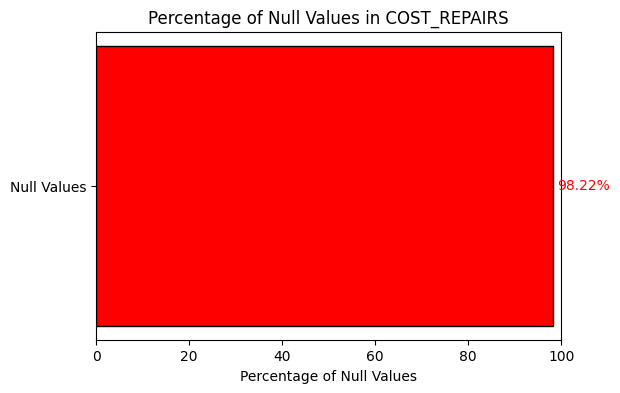

In [29]:
# Select the column for which you want to calculate the percentage of null values
column_name = 'COST_REPAIRS'

# Calculate the percentage of null values in the selected column
null_percentage = (y_cost[column_name].isnull().sum() / len(df)) * 100

# Create a bar plot to display the percentage of null values
plt.figure(figsize=(6, 4))
plt.barh(['Null Values'], [null_percentage], color='red', edgecolor='black')
plt.xlim(0, 100)
plt.xlabel('Percentage of Null Values')
plt.title(f'Percentage of Null Values in {column_name}')
plt.text(null_percentage + 1, 0, f'{null_percentage:.2f}%', va='center', color='red')
plt.show()

#### Percentage of Null values

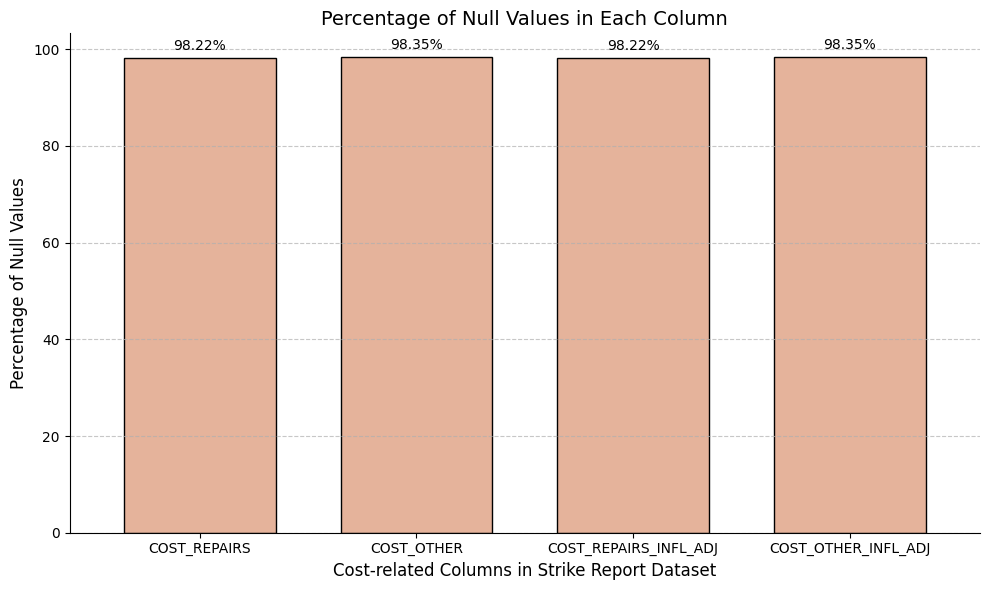

In [30]:
# Calculate the percentage of null values for each column
null_percentage = (y_cost.isnull().sum() / len(df)) * 100

# Create a bar plot to display the percentage of null values for each column
plt.figure(figsize=(10, 6))
ax = null_percentage.plot(kind='bar', color='#E5B39B', edgecolor='black', width=0.7)

# Adding labels and titles
plt.xlabel('Cost-related Columns in Strike Report Dataset', fontsize=12)
plt.ylabel('Percentage of Null Values', fontsize=12)
plt.title('Percentage of Null Values in Each Column', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adding data labels on top of the bars
for i, v in enumerate(null_percentage):
    plt.text(i, v + 1, f'{v:0.2f}%', ha='center', va='bottom', fontsize=10)

# Customizing the appearance
plt.xticks(rotation=0, fontsize=10)
plt.yticks(fontsize=10)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.tight_layout()

plt.show()

#### Non null values in cost repairs

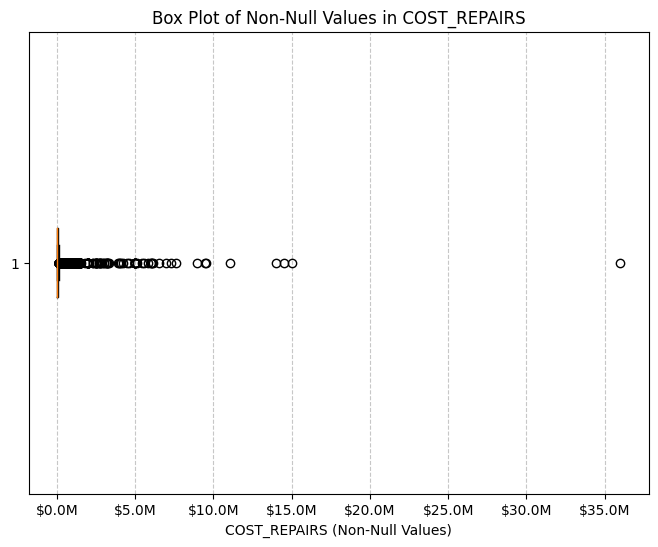

In [31]:
# Select the 'COST_REPAIRS' column and drop the null values
cost_repairs_non_null = y_cost['COST_REPAIRS'].dropna()

from matplotlib.ticker import FuncFormatter
# Create a box plot to visualize the distribution of non-null values
plt.figure(figsize=(8, 6))
plt.boxplot(cost_repairs_non_null, vert=False)
plt.xlabel('COST_REPAIRS (Non-Null Values)')
plt.title('Box Plot of Non-Null Values in COST_REPAIRS')
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Format x-axis labels to display values in dollars
def dollar_formatter(x, pos):
    return f'${x/1e6:.1f}M'

formatter = FuncFormatter(dollar_formatter)
plt.gca().xaxis.set_major_formatter(formatter)

plt.show()

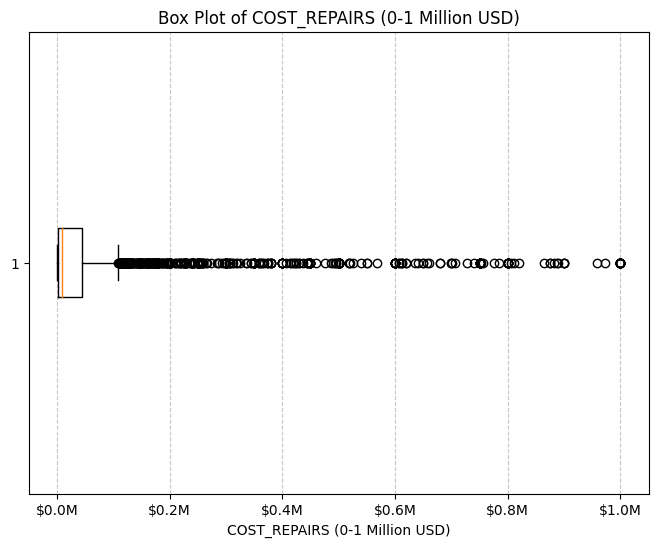

In [32]:
# Filter the 'COST_REPAIRS' column to include only values between 0 and 1 million dollars
cost_repairs_filtered = y_cost['COST_REPAIRS'][(y_cost['COST_REPAIRS'] >= 0) & (y_cost['COST_REPAIRS'] <= 1000000)]

# Create a box plot for the filtered data
plt.figure(figsize=(8, 6))
plt.boxplot(cost_repairs_filtered, vert=False)
plt.xlabel('COST_REPAIRS (0-1 Million USD)')
plt.title('Box Plot of COST_REPAIRS (0-1 Million USD)')
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Format x-axis labels to display values in dollars
def dollar_formatter(x, pos):
    return f'${x/1e6:.1f}M'

formatter = FuncFormatter(dollar_formatter)
plt.gca().xaxis.set_major_formatter(formatter)

plt.show()

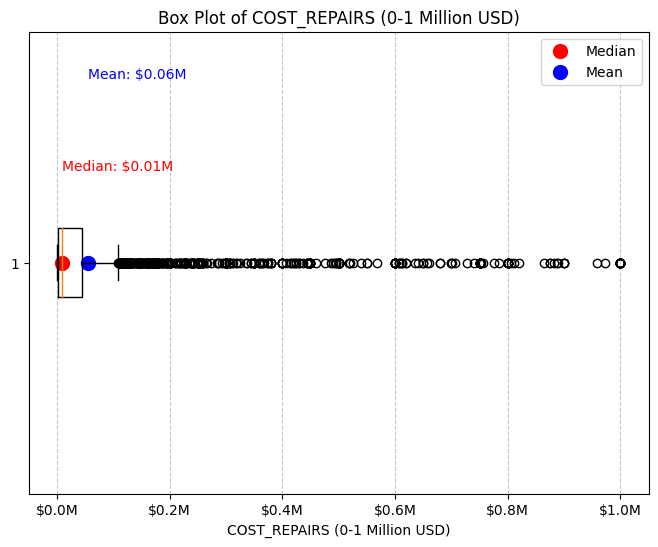

In [33]:
# Filter the 'COST_REPAIRS' column to include only values between 0 and 1 million dollars
cost_repairs_filtered = y_cost['COST_REPAIRS'][(y_cost['COST_REPAIRS'] >= 0) & (y_cost['COST_REPAIRS'] <= 1000000)]

# Create a box plot for the filtered data
plt.figure(figsize=(8, 6))
plt.boxplot(cost_repairs_filtered, vert=False)
plt.xlabel('COST_REPAIRS (0-1 Million USD)')
plt.title('Box Plot of COST_REPAIRS (0-1 Million USD)')
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Calculate the median and mean
median_value = cost_repairs_filtered.median()
mean_value = cost_repairs_filtered.mean()

# Format x-axis labels to display values in dollars
def dollar_formatter(x, pos):
    return f'${x/1e6:.1f}M'

formatter = FuncFormatter(dollar_formatter)
plt.gca().xaxis.set_major_formatter(formatter)

# Display the median value as a red dot on the plot and label it
plt.scatter(median_value, 1, color='red', marker='o', s=100, label='Median')
plt.annotate(f'Median: ${median_value/1e6:.2f}M', (median_value, 1.2), color='red')

# Display the mean value as a blue dot on the plot and label it
plt.scatter(mean_value, 1, color='blue', marker='o', s=100, label='Mean')
plt.annotate(f'Mean: ${mean_value/1e6:.2f}M', (mean_value, 1.4), color='blue')

# Add a legend
plt.legend()

plt.show()

#### Non null values in Cost Other

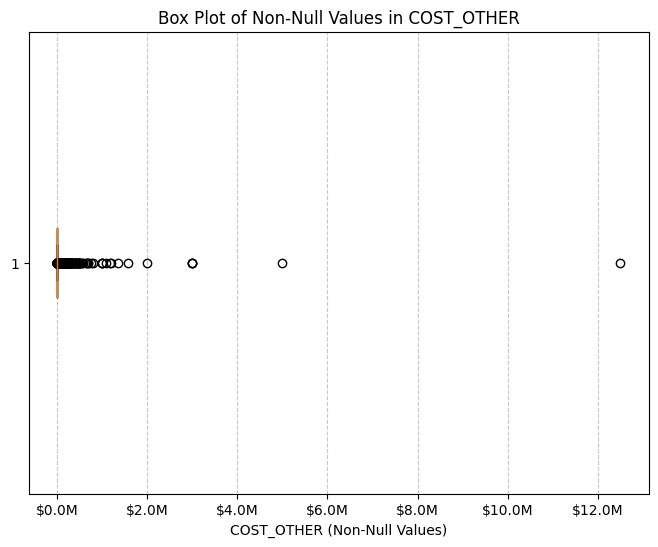

In [34]:
# Select the 'COST_REPAIRS' column and drop the null values
cost_repairs_non_null = y_cost['COST_OTHER'].dropna()

from matplotlib.ticker import FuncFormatter
# Create a box plot to visualize the distribution of non-null values
plt.figure(figsize=(8, 6))
plt.boxplot(cost_repairs_non_null, vert=False)
plt.xlabel('COST_OTHER (Non-Null Values)')
plt.title('Box Plot of Non-Null Values in COST_OTHER')
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Format x-axis labels to display values in dollars
def dollar_formatter(x, pos):
    return f'${x/1e6:.1f}M'

formatter = FuncFormatter(dollar_formatter)
plt.gca().xaxis.set_major_formatter(formatter)

plt.show()

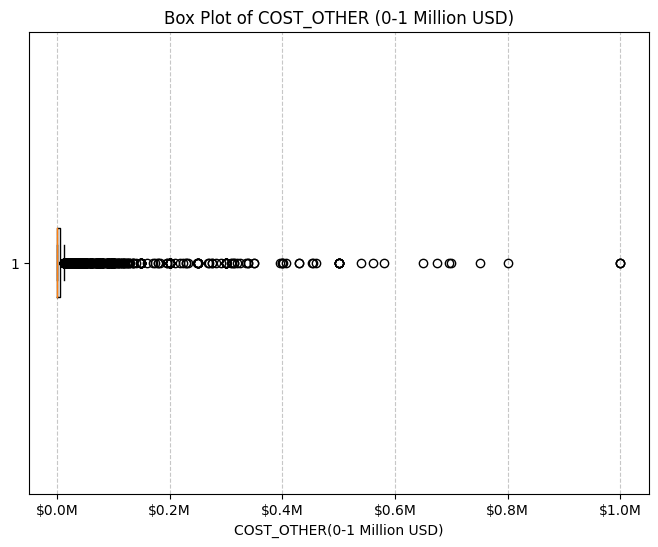

In [35]:
# Filter the 'COST_REPAIRS' column to include only values between 0 and 1 million dollars
cost_repairs_filtered = y_cost['COST_OTHER'][(y_cost['COST_OTHER'] >= 0) & (y_cost['COST_OTHER'] <= 1000000)]

# Create a box plot for the filtered data
plt.figure(figsize=(8, 6))
plt.boxplot(cost_repairs_filtered, vert=False)
plt.xlabel('COST_OTHER(0-1 Million USD)')
plt.title('Box Plot of COST_OTHER (0-1 Million USD)')
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Format x-axis labels to display values in dollars
def dollar_formatter(x, pos):
    return f'${x/1e6:.1f}M'

formatter = FuncFormatter(dollar_formatter)
plt.gca().xaxis.set_major_formatter(formatter)

plt.show()

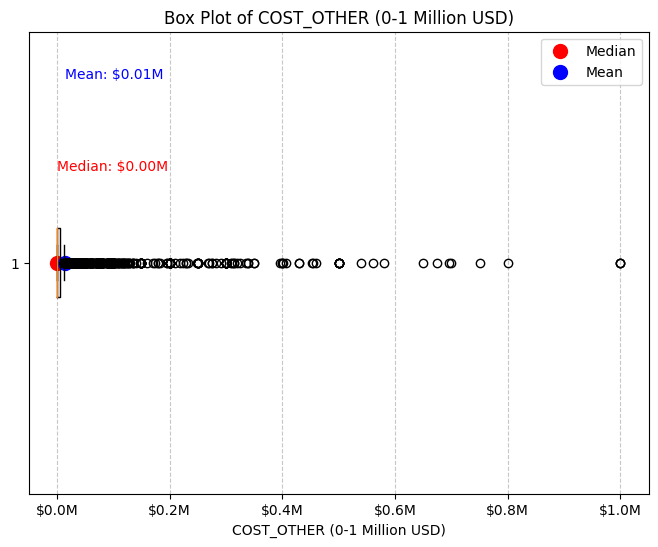

In [36]:
# Filter the 'COST_REPAIRS' column to include only values between 0 and 1 million dollars
cost_repairs_filtered = y_cost['COST_OTHER'][(y_cost['COST_OTHER'] >= 0) & (y_cost['COST_OTHER'] <= 1000000)]

# Create a box plot for the filtered data
plt.figure(figsize=(8, 6))
plt.boxplot(cost_repairs_filtered, vert=False)
plt.xlabel('COST_OTHER (0-1 Million USD)')
plt.title('Box Plot of COST_OTHER (0-1 Million USD)')
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Calculate the median and mean
median_value = cost_repairs_filtered.median()
mean_value = cost_repairs_filtered.mean()

# Format x-axis labels to display values in dollars
def dollar_formatter(x, pos):
    return f'${x/1e6:.1f}M'

formatter = FuncFormatter(dollar_formatter)
plt.gca().xaxis.set_major_formatter(formatter)

# Display the median value as a red dot on the plot and label it
plt.scatter(median_value, 1, color='red', marker='o', s=100, label='Median')
plt.annotate(f'Median: ${median_value/1e6:.2f}M', (median_value, 1.2), color='red')

# Display the mean value as a blue dot on the plot and label it
plt.scatter(mean_value, 1, color='blue', marker='o', s=100, label='Mean')
plt.annotate(f'Mean: ${mean_value/1e6:.2f}M', (mean_value, 1.4), color='blue')

# Add a legend
plt.legend()

plt.show()


### Cost Analysis: Ranges

In [37]:
y_cost.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 285560 entries, 0 to 285559
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   COST_REPAIRS           5085 non-null   float64
 1   COST_OTHER             4701 non-null   float64
 2   COST_REPAIRS_INFL_ADJ  5085 non-null   float64
 3   COST_OTHER_INFL_ADJ    4701 non-null   float64
dtypes: float64(4)
memory usage: 8.7 MB


#### Read DAMAGE LEVEL & COSTs

In [38]:
damage_cost = df.loc[:, ['DAMAGE_LEVEL', 'COST_REPAIRS']]

In [39]:
damage_cost.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 285560 entries, 0 to 285559
Data columns (total 2 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   DAMAGE_LEVEL  185633 non-null  object 
 1   COST_REPAIRS  5085 non-null    float64
dtypes: float64(1), object(1)
memory usage: 4.4+ MB


In [40]:
damage_cost = damage_cost[damage_cost['DAMAGE_LEVEL'].notna()]
damage_cost = damage_cost[damage_cost['DAMAGE_LEVEL'] != 'N']
damage_cost.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19659 entries, 4 to 285504
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   DAMAGE_LEVEL  19659 non-null  object 
 1   COST_REPAIRS  5020 non-null   float64
dtypes: float64(1), object(1)
memory usage: 460.8+ KB


In [41]:
#damage_cost.loc[(damage_cost['DAMAGE_LEVEL'] == 'N'), 'COST_REPAIRS'] = 0

In [42]:
#damage_cost['DAMAGE_LEVEL'].replace("N", 0, inplace=True)
damage_cost['DAMAGE_LEVEL'].replace("M", 0, inplace=True)
damage_cost['DAMAGE_LEVEL'].replace("M?", 0, inplace=True)
damage_cost['DAMAGE_LEVEL'].replace("S", 1, inplace=True)
damage_cost['DAMAGE_LEVEL'].replace("D", 1, inplace=True)

#### Outliers in Cost repairs

In [43]:
damage_cost['COST_REPAIRS'].describe()

count       5020.00
mean      136596.74
std       822662.89
min            2.00
25%         2500.00
50%        12000.00
75%        50000.00
max     36000000.00
Name: COST_REPAIRS, dtype: float64

In [44]:
minor = damage_cost[damage_cost.DAMAGE_LEVEL == 0]

<Axes: >

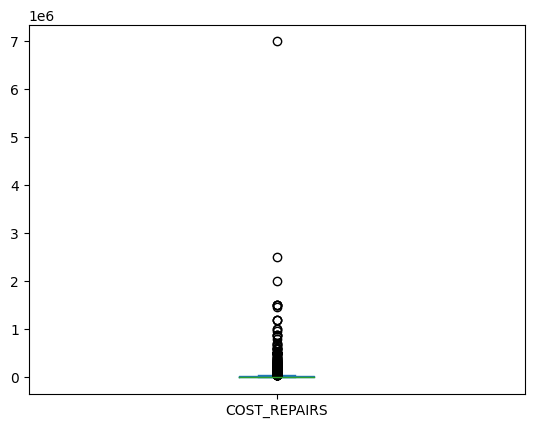

In [45]:
minor['COST_REPAIRS'].plot(kind='box')

In [46]:
minor['COST_REPAIRS'].describe()

count      3357.00
mean      37053.02
std      168877.69
min           2.00
25%        1500.00
50%        6100.00
75%       24605.00
max     7000000.00
Name: COST_REPAIRS, dtype: float64

In [47]:
from sklearn.preprocessing import MinMaxScaler

# Extract the column for normalization
minor_repairs = minor['COST_REPAIRS'].values.reshape(-1, 1)

# Apply Min-Max scaling
scaler = MinMaxScaler()
cost_repairs_scaled = scaler.fit_transform(minor_repairs)

# Create a DataFrame with the scaled values
minor_repairs_scaled = pd.DataFrame(cost_repairs_scaled, columns=['COST_REPAIRS_SCALED'])

# Display the mean and median of the normalized data
mean_normalized = minor_repairs_scaled['COST_REPAIRS_SCALED'].mean()
median_normalized = minor_repairs_scaled['COST_REPAIRS_SCALED'].median()

print(f"Mean (after normalization): {mean_normalized:.2f}")
print(f"Median (after normalization): {median_normalized:.2f}")


Mean (after normalization): 0.01
Median (after normalization): 0.00


In [48]:
import numpy as np

# Assuming 'df' is your DataFrame and 'COST_REPAIRS' is the column of interest
# Replace 'df' and 'COST_REPAIRS' with your actual DataFrame and column name

# Log-transform the 'COST_REPAIRS' column
minor['COST_REPAIRS_LOG'] = np.log1p(minor['COST_REPAIRS'])

# Calculate the interquartile range (IQR) on the log-transformed data
Q1_log = minor['COST_REPAIRS_LOG'].quantile(0.25)
Q3_log = minor['COST_REPAIRS_LOG'].quantile(0.75)
IQR_log = Q3_log - Q1_log

# Define a lower and upper bound for the log-transformed cost range
lower_bound_log = Q1_log - 1.5 * IQR_log
upper_bound_log = Q3_log + 1.5 * IQR_log

# Convert the bounds back to the original scale
lower_bound = np.expm1(lower_bound_log)
upper_bound = np.expm1(upper_bound_log)

print(f"Lower Bound: {lower_bound:.2f}")
print(f"Upper Bound: {upper_bound:.2f}")


Lower Bound: 21.61
Upper Bound: 1633169.44


5th Percentile: nan
50th Percentile (Median): nan
95th Percentile: nan


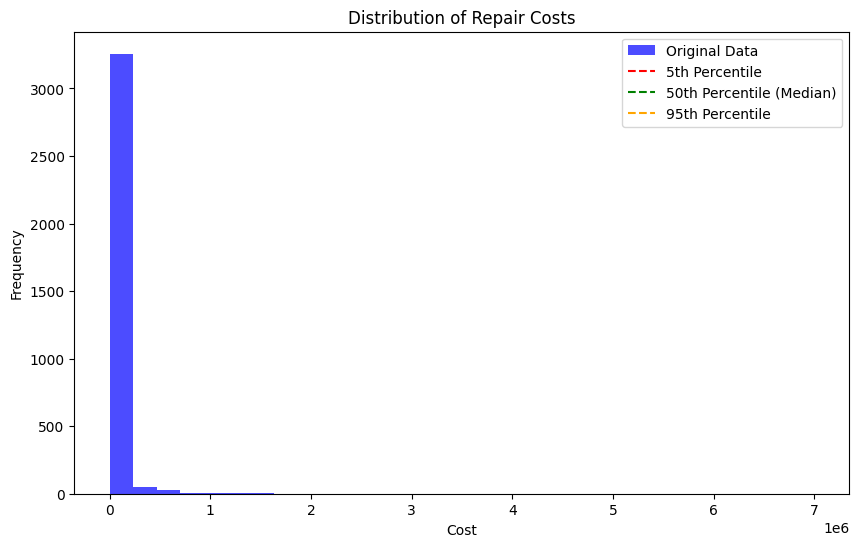

In [49]:
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame and 'COST_REPAIRS' is the column of interest
# Replace 'df' and 'COST_REPAIRS' with your actual DataFrame and column name

# Log-transform the 'COST_REPAIRS' column
minor['COST_REPAIRS_LOG'] = np.log1p(minor['COST_REPAIRS'])

# Calculate the percentiles
percentiles = [5, 50, 95]
percentile_values = np.percentile(minor['COST_REPAIRS'], percentiles)

print(f"5th Percentile: {percentile_values[0]:.2f}")
print(f"50th Percentile (Median): {percentile_values[1]:.2f}")
print(f"95th Percentile: {percentile_values[2]:.2f}")

# Create a histogram for visualization
plt.figure(figsize=(10, 6))
plt.hist(minor['COST_REPAIRS'], bins=30, color='blue', alpha=0.7, label='Original Data')
plt.axvline(x=percentile_values[0], color='red', linestyle='--', label='5th Percentile')
plt.axvline(x=percentile_values[1], color='green', linestyle='--', label='50th Percentile (Median)')
plt.axvline(x=percentile_values[2], color='orange', linestyle='--', label='95th Percentile')
plt.title('Distribution of Repair Costs')
plt.xlabel('Cost')
plt.ylabel('Frequency')
plt.legend()
plt.show()


In [50]:
import scipy.stats as stats

# Assuming 'df' is your DataFrame and 'COST_REPAIRS' is the column of interest
# Replace 'df' and 'COST_REPAIRS' with your actual DataFrame and column name

# Log-transform the 'COST_REPAIRS' column
minor['COST_REPAIRS_LOG'] = np.log1p(minor['COST_REPAIRS'])

# Calculate the mean and standard deviation on the log-transformed data
mean_log = minor['COST_REPAIRS_LOG'].mean()
std_dev_log = minor['COST_REPAIRS_LOG'].std()

# Set the confidence level (e.g., 95% confidence interval)
confidence_level = 0.95

# Calculate the margin of error
margin_of_error = stats.norm.ppf((1 + confidence_level) / 2) * (std_dev_log / np.sqrt(len(df)))

# Calculate the lower and upper bounds of the confidence interval
lower_bound_log = mean_log - margin_of_error
upper_bound_log = mean_log + margin_of_error

# Convert bounds back to the original scale
lower_bound = np.expm1(lower_bound_log)
upper_bound = np.expm1(upper_bound_log)

print(f"{confidence_level * 100}% Confidence Interval: ({lower_bound:.2f}, {upper_bound:.2f})")


95.0% Confidence Interval: (5673.46, 5758.73)


In [51]:
sub = damage_cost[damage_cost.DAMAGE_LEVEL == 1]

<Axes: >

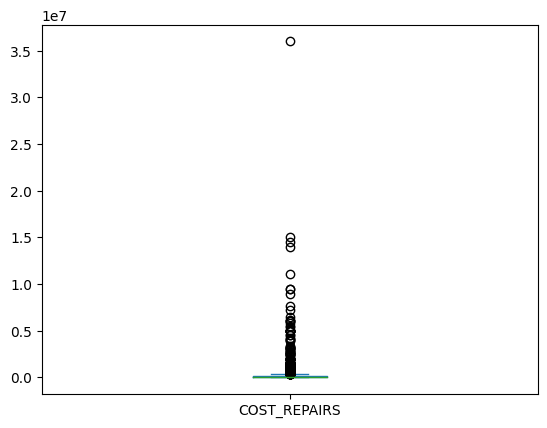

In [52]:
sub['COST_REPAIRS'].plot(kind='box')

In [53]:
import scipy.stats as stats

# Assuming 'df' is your DataFrame and 'COST_REPAIRS' is the column of interest
# Replace 'df' and 'COST_REPAIRS' with your actual DataFrame and column name

# Log-transform the 'COST_REPAIRS' column
sub['COST_REPAIRS_LOG'] = np.log1p(sub['COST_REPAIRS'])

# Calculate the mean and standard deviation on the log-transformed data
mean_log = sub['COST_REPAIRS_LOG'].mean()
std_dev_log = sub['COST_REPAIRS_LOG'].std()

# Set the confidence level (e.g., 95% confidence interval)
confidence_level = 0.95

# Calculate the margin of error
margin_of_error = stats.norm.ppf((1 + confidence_level) / 2) * (std_dev_log / np.sqrt(len(df)))

# Calculate the lower and upper bounds of the confidence interval
lower_bound_log = mean_log - margin_of_error
upper_bound_log = mean_log + margin_of_error

# Convert bounds back to the original scale
lower_bound = np.expm1(lower_bound_log)
upper_bound = np.expm1(upper_bound_log)

print(f"{confidence_level * 100}% Confidence Interval: ({lower_bound:.2f}, {upper_bound:.2f})")

95.0% Confidence Interval: (45636.89, 46292.19)


In [54]:
damage_cost.groupby('DAMAGE_LEVEL').agg({'COST_REPAIRS':'max'})

,COST_REPAIRS
DAMAGE_LEVEL,
0,7000000.00
1,36000000.00


Comment: Looking at the summary statistics of Cost Repairs column. It is evident that outliers are present.

In [55]:
damage_cost.groupby('DAMAGE_LEVEL')['COST_REPAIRS'].mean()

DAMAGE_LEVEL
0    37053.02
1   337539.78
Name: COST_REPAIRS, dtype: float64

Comment: Grouping the damage level and looking at the mean value of cost repairs in each level

In [56]:
damage_cost.groupby('DAMAGE_LEVEL')['COST_REPAIRS'].min()

DAMAGE_LEVEL
0     2.00
1   120.00
Name: COST_REPAIRS, dtype: float64

Comment: Grouping the damage level and looking at the minimum value of cost repairs in each level

In [57]:
damage_cost.groupby('DAMAGE_LEVEL')['COST_REPAIRS'].max()

DAMAGE_LEVEL
0    7000000.00
1   36000000.00
Name: COST_REPAIRS, dtype: float64

Comment: Grouping the damage level and looking at the max value of cost repairs in each level

<Axes: >

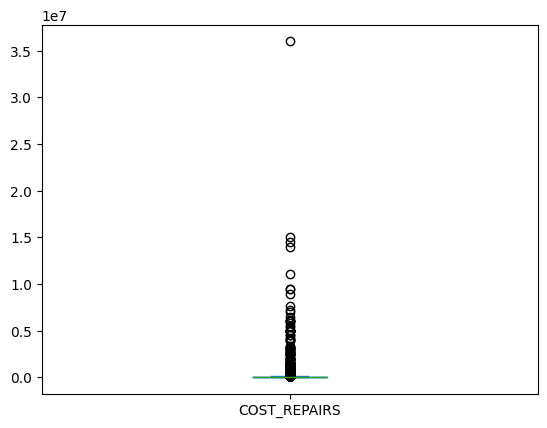

In [58]:
damage_cost['COST_REPAIRS'].plot(kind='box')

Comment: Since there are outliers in the cost repairs column, by applying log transformation on the column, it looks better now

In [59]:
# 1. Outlier Detection and Handling (using IQR)
Q1 = damage_cost['COST_REPAIRS'].quantile(0.25)
Q3 = damage_cost['COST_REPAIRS'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR


In [60]:
print(lower_bound, ',', upper_bound)

-68750.0 , 121250.0


In [61]:
damage_cost['COST_REPAIRS_TRANSFORMED'] = damage_cost[(damage_cost['COST_REPAIRS'] >= lower_bound) & (damage_cost['COST_REPAIRS'] <= upper_bound)]['COST_REPAIRS']

#### Distribution of cost in each level with Outliers

In [62]:
# Get unique damage level classes
damage_levels = damage_cost['DAMAGE_LEVEL'].unique()

In [63]:
damage_levels

array([0, 1])

In [64]:
damage_cost['COST_REPAIRS'].fillna(0, inplace=True)

<Axes: >

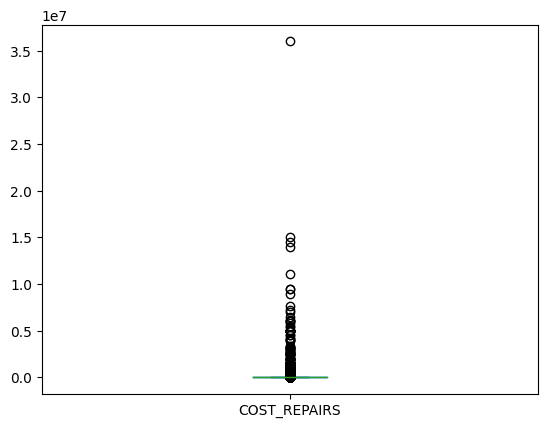

In [65]:
damage_cost['COST_REPAIRS'].plot(kind='box')

In [66]:
# Calculate ranges for each damage level
ranges = {}
for level in damage_levels:
    subset = damage_cost[damage_cost['DAMAGE_LEVEL'] == level]
    cost_range = (subset['COST_REPAIRS'].min(), subset['COST_REPAIRS'].max())
    ranges[level] = cost_range

# Print the ranges
for level, cost_range in ranges.items():
    print(f'Damage Level: {level}, Cost Range: {cost_range}')

Damage Level: 0, Cost Range: (0.0, 7000000.0)
Damage Level: 1, Cost Range: (0.0, 36000000.0)


In [67]:
# Calculate ranges for each damage level
ranges = {}
for level in damage_levels:
    subset = damage_cost[damage_cost['DAMAGE_LEVEL'] == level]
    iqr = np.percentile(subset['COST_REPAIRS'], 75) - np.percentile(subset['COST_REPAIRS'], 25)
    print(f'Damage Level: {level}, IQR: {iqr}')

# Print the ranges
for level, cost_range in ranges.items():
    print(f'Damage Level: {level}, Cost Range: {cost_range}')

Damage Level: 0, IQR: 0.0
Damage Level: 1, IQR: 20000.0


In [68]:
import scipy.stats as stats

In [69]:
# Calculate and print the 95% confidence interval for each class
for level in damage_levels:
    subset = damage_cost[damage_cost['DAMAGE_LEVEL'] == level]
    cost_values = subset['COST_REPAIRS']
    confidence_interval = stats.t.interval(0.95, len(cost_values) - 1, loc=cost_values.mean(), scale=stats.sem(cost_values))
    rounded_interval = (round(confidence_interval[0], 2), round(confidence_interval[1], 2))
    print(f'Damage Level: {level}, 95% Confidence Interval: {rounded_interval}')

Damage Level: 0, 95% Confidence Interval: (6841.05, 9390.04)
Damage Level: 1, 95% Confidence Interval: (103508.14, 155646.36)


#### Distribution of cost in each level without Outliers

In [70]:
# Get unique damage level classes
damage_levels = damage_cost['DAMAGE_LEVEL'].unique()

In [71]:
damage_levels

array([0, 1])

In [72]:
damage_cost.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19659 entries, 4 to 285504
Data columns (total 3 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   DAMAGE_LEVEL              19659 non-null  int64  
 1   COST_REPAIRS              19659 non-null  float64
 2   COST_REPAIRS_TRANSFORMED  4375 non-null   float64
dtypes: float64(2), int64(1)
memory usage: 614.3 KB


In [73]:
damage_cost['COST_REPAIRS_TRANSFORMED'].fillna(0, inplace=True)

<Axes: >

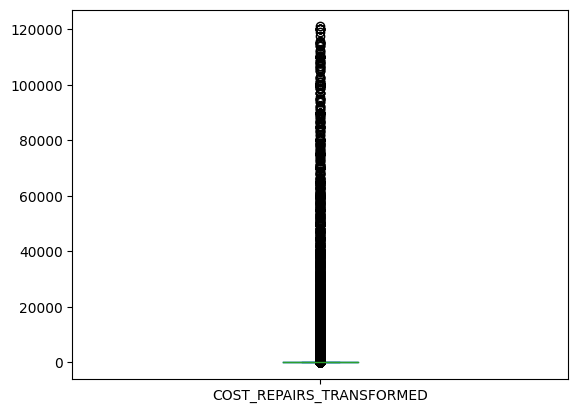

In [74]:
damage_cost['COST_REPAIRS_TRANSFORMED'].plot(kind='box')

In [75]:
# Calculate ranges for each damage level
ranges = {}
for level in damage_levels:
    subset = damage_cost[damage_cost['DAMAGE_LEVEL'] == level]
    cost_range = (subset['COST_REPAIRS_TRANSFORMED'].min(), subset['COST_REPAIRS_TRANSFORMED'].max())
    ranges[level] = cost_range

# Print the ranges
for level, cost_range in ranges.items():
    print(f'Damage Level: {level}, Cost Range: {cost_range}')

Damage Level: 0, Cost Range: (0.0, 121050.0)
Damage Level: 1, Cost Range: (0.0, 120000.0)


In [76]:
# Calculate ranges for each damage level
ranges = {}
for level in damage_levels:
    subset = damage_cost[damage_cost['DAMAGE_LEVEL'] == level]
    iqr = np.percentile(subset['COST_REPAIRS_TRANSFORMED'], 75) - np.percentile(subset['COST_REPAIRS_TRANSFORMED'], 25)
    print(f'Damage Level: {level}, IQR: {iqr}')

# Print the ranges
for level, cost_range in ranges.items():
    print(f'Damage Level: {level}, Cost Range: {cost_range}')

Damage Level: 0, IQR: 0.0
Damage Level: 1, IQR: 2700.0


In [77]:
import scipy.stats as stats

In [78]:
# Calculate and print the 95% confidence interval for each class
for level in damage_levels:
    subset = damage_cost[damage_cost['DAMAGE_LEVEL'] == level]
    cost_values = subset['COST_REPAIRS_TRANSFORMED']
    confidence_interval = stats.t.interval(0.95, len(cost_values) - 1, loc=cost_values.mean(), scale=stats.sem(cost_values))
    rounded_interval = (round(confidence_interval[0], 2), round(confidence_interval[1], 2))
    print(f'Damage Level: {level}, 95% Confidence Interval: {rounded_interval}')

Damage Level: 0, 95% Confidence Interval: (2949.16, 3327.21)
Damage Level: 1, 95% Confidence Interval: (8787.86, 10138.74)


#### Assign cost ranges for each level

In [79]:
damage_cost = df.loc[:, ['DAMAGE_LEVEL', 'COST_REPAIRS']]
damage_cost = damage_cost[damage_cost['DAMAGE_LEVEL'].notna()]
damage_cost.loc[(damage_cost['DAMAGE_LEVEL'] == 'N'), 'COST_REPAIRS'] = 0

damage_cost['DAMAGE_LEVEL'].replace("N", 0, inplace=True)
damage_cost['DAMAGE_LEVEL'].replace("M", 1, inplace=True)
damage_cost['DAMAGE_LEVEL'].replace("M?", 1, inplace=True)
damage_cost['DAMAGE_LEVEL'].replace("S", 2, inplace=True)
damage_cost['DAMAGE_LEVEL'].replace("D", 2, inplace=True)

# 1. Outlier Detection and Handling (using IQR)
Q1 = damage_cost['COST_REPAIRS'].quantile(0.25)
Q3 = damage_cost['COST_REPAIRS'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
#print(lower_bound, ',', upper_bound)

damage_cost['COST_REPAIRS_TRANSFORMED'] = damage_cost[(damage_cost['COST_REPAIRS'] >= lower_bound) & (damage_cost['COST_REPAIRS'] <= upper_bound)]['COST_REPAIRS']
# Get unique damage level classes
damage_levels = damage_cost['DAMAGE_LEVEL'].unique()

damage_cost['COST_REPAIRS'].fillna(0, inplace=True)


# Calculate ranges for each damage level
ranges = {}
for level in damage_levels:
    subset = damage_cost[damage_cost['DAMAGE_LEVEL'] == level]
    cost_range = (subset['COST_REPAIRS'].min(), subset['COST_REPAIRS'].max())
    ranges[level] = cost_range
print("Min-Max")
# Print the ranges
for level, cost_range in ranges.items():
    print(f'Damage Level: {level}, Cost Range: {cost_range}')
print()
print("IQR")
# Calculate ranges for each damage level
ranges = {}
for level in damage_levels:
    subset = damage_cost[damage_cost['DAMAGE_LEVEL'] == level]
    iqr = np.percentile(subset['COST_REPAIRS'], 75) - np.percentile(subset['COST_REPAIRS'], 25)
    print(f'Damage Level: {level}, IQR: {iqr}')

# Print the ranges
for level, cost_range in ranges.items():
    print(f'Damage Level: {level}, Cost Range: {cost_range}')
print()
print("Confidence Interval")
import scipy.stats as stats
# Calculate and print the 95% confidence interval for each class
for level in damage_levels:
    subset = damage_cost[damage_cost['DAMAGE_LEVEL'] == level]
    cost_values = subset['COST_REPAIRS']
    confidence_interval = stats.t.interval(0.95, len(cost_values) - 1, loc=cost_values.mean(), scale=stats.sem(cost_values))
    rounded_interval = (round(confidence_interval[0], 2), round(confidence_interval[1], 2))
    print(f'Damage Level: {level}, 95% Confidence Interval: {rounded_interval}')




Min-Max
Damage Level: 0, Cost Range: (0.0, 0.0)
Damage Level: 1, Cost Range: (0.0, 7000000.0)
Damage Level: 2, Cost Range: (0.0, 36000000.0)

IQR
Damage Level: 0, IQR: 0.0
Damage Level: 1, IQR: 0.0
Damage Level: 2, IQR: 20000.0

Confidence Interval
Damage Level: 0, 95% Confidence Interval: (nan, nan)
Damage Level: 1, 95% Confidence Interval: (6841.05, 9390.04)
Damage Level: 2, 95% Confidence Interval: (103508.14, 155646.36)


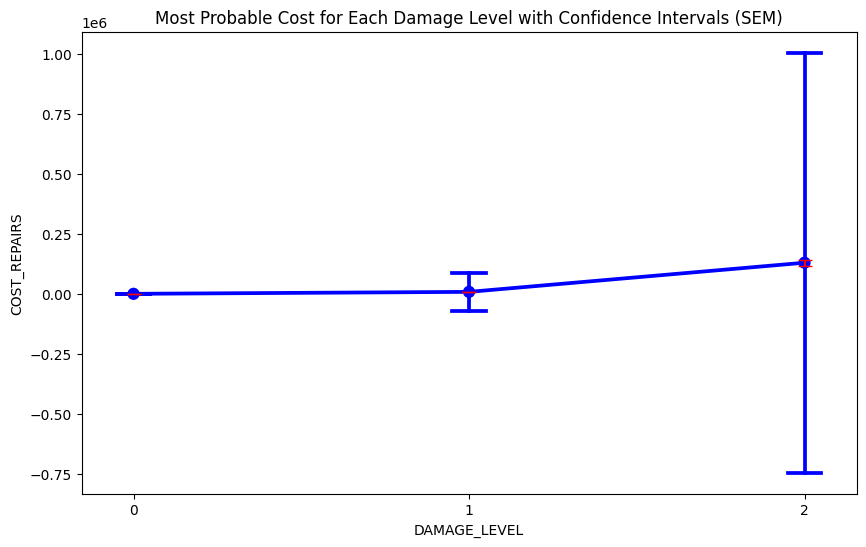

In [80]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Assuming you have a DataFrame named 'df' with 'Damage Level' and 'Cost' columns
# Replace 'your_dataframe.csv' with the actual file path if loading from a CSV file
# df = pd.read_csv('your_dataframe.csv')

# Plotting the most probable cost and confidence intervals
plt.figure(figsize=(10, 6))
sns.pointplot(x='DAMAGE_LEVEL', y='COST_REPAIRS', data=damage_cost, color='blue', capsize=0.1, ci='sd')

# Adding standard error of the mean (SEM) as error bars
sem = damage_cost.groupby('DAMAGE_LEVEL')['COST_REPAIRS'].sem().values
plt.errorbar(x=damage_cost['DAMAGE_LEVEL'].unique(), y=damage_cost.groupby('DAMAGE_LEVEL')['COST_REPAIRS'].mean().values,
             yerr=sem, fmt='none', color='red', capsize=5)

# Adding labels and title
plt.xlabel('DAMAGE_LEVEL')
plt.ylabel('COST_REPAIRS')
plt.title('Most Probable Cost for Each Damage Level with Confidence Intervals (SEM)')

# Show the plot
plt.show()


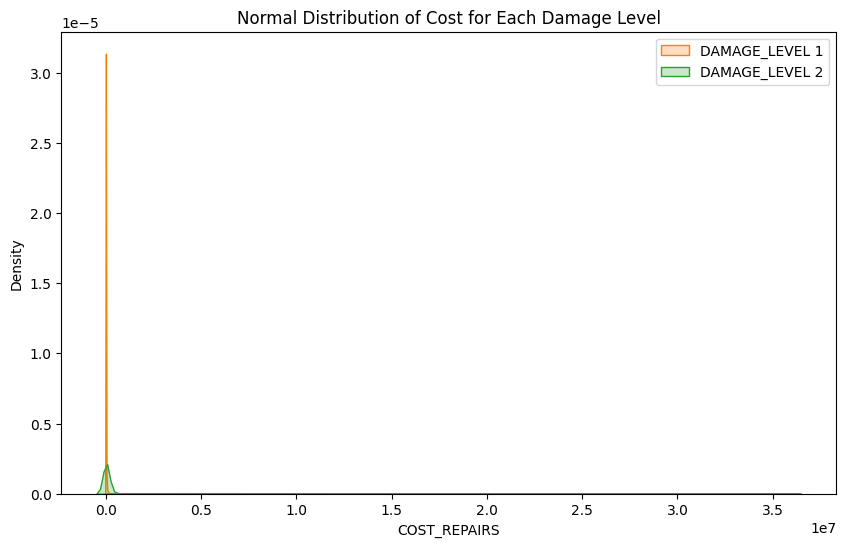

In [81]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Assuming you have a DataFrame named 'df' with 'Damage Level' and 'Cost' columns
# Replace 'your_dataframe.csv' with the actual file path if loading from a CSV file
# df = pd.read_csv('your_dataframe.csv')

# Plotting using a normal distribution plot
plt.figure(figsize=(10, 6))

# Iterate through each damage level
for level in damage_cost['DAMAGE_LEVEL'].unique():
    # Extract cost data for the current damage level
    data = damage_cost[damage_cost['DAMAGE_LEVEL'] == level]['COST_REPAIRS']

    # Plot a normal distribution curve for the cost
    sns.kdeplot(data, label=f'DAMAGE_LEVEL {level}', fill=True)

# Adding labels and title
plt.xlabel('COST_REPAIRS')
plt.ylabel('Density')
plt.title('Normal Distribution of Cost for Each Damage Level')

# Show the plot
plt.legend()
plt.show()


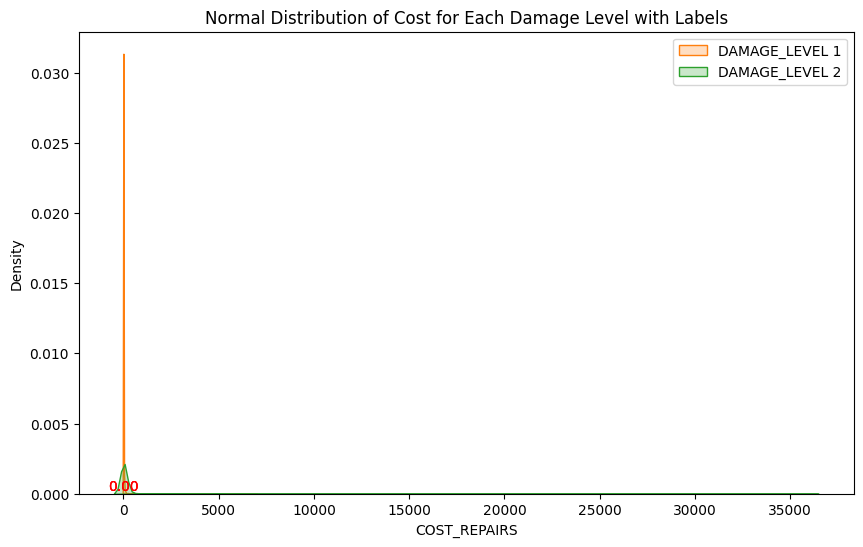

In [86]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Assuming you have a DataFrame named 'df' with 'Damage Level' and 'Cost' columns
# Replace 'your_dataframe.csv' with the actual file path if loading from a CSV file
# df = pd.read_csv('your_dataframe.csv')

# Plotting using a normal distribution plot
plt.figure(figsize=(10, 6))

# Iterate through each damage level
for level in damage_cost['DAMAGE_LEVEL'].unique():
    # Extract cost data for the current damage level
    data = damage_cost[(damage_cost['DAMAGE_LEVEL'] == level)]['COST_REPAIRS']

    # Convert cost to thousands of USD for the plot
    data_in_thousands = data / 1000
    # Plot a normal distribution curve for the cost
    sns.kdeplot(data_in_thousands, label=f'DAMAGE_LEVEL {level}', fill=True)

    # Find the mode (most probable cost) for the current damage level
    most_probable_cost = data_in_thousands.mode().values[0]

    # Label the mode on the plot
    plt.text(most_probable_cost, 0, f'{most_probable_cost:.2f}', verticalalignment='bottom', horizontalalignment='center', color='red')

# Adding labels and title
plt.xlabel('COST_REPAIRS')
plt.ylabel('Density')
plt.title('Normal Distribution of Cost for Each Damage Level with Labels')

# Show the plot
plt.legend()
plt.show()


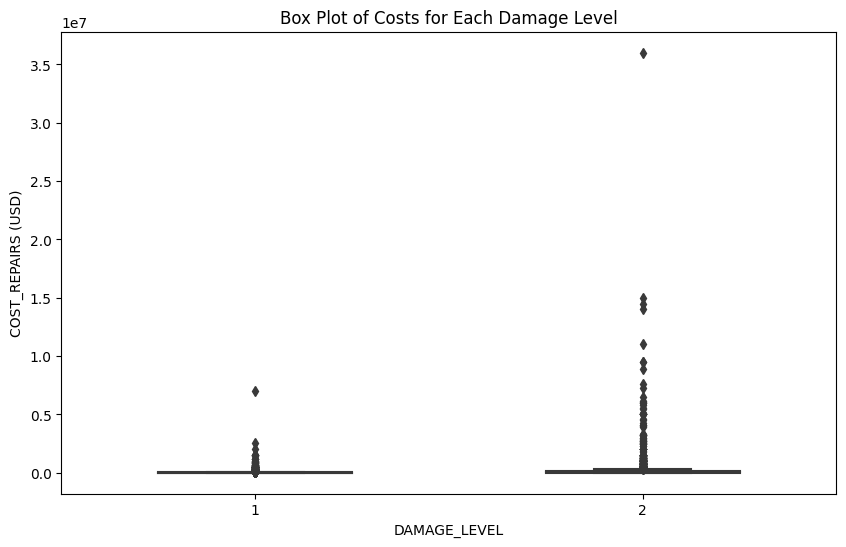

In [89]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Assuming you have a DataFrame named 'df' with 'Damage Level' and 'Cost' columns
# Replace 'your_dataframe.csv' with the actual file path if loading from a CSV file
# df = pd.read_csv('your_dataframe.csv')
damage_cost = damage_cost.loc[damage_cost.COST_REPAIRS >0 ]
# Create a box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='DAMAGE_LEVEL', y='COST_REPAIRS', data=damage_cost, width=0.5, palette='viridis')

# Adding labels and title
plt.xlabel('DAMAGE_LEVEL')
plt.ylabel('COST_REPAIRS (USD)')
plt.title('Box Plot of Costs for Each Damage Level')

# Show the plot
plt.show()


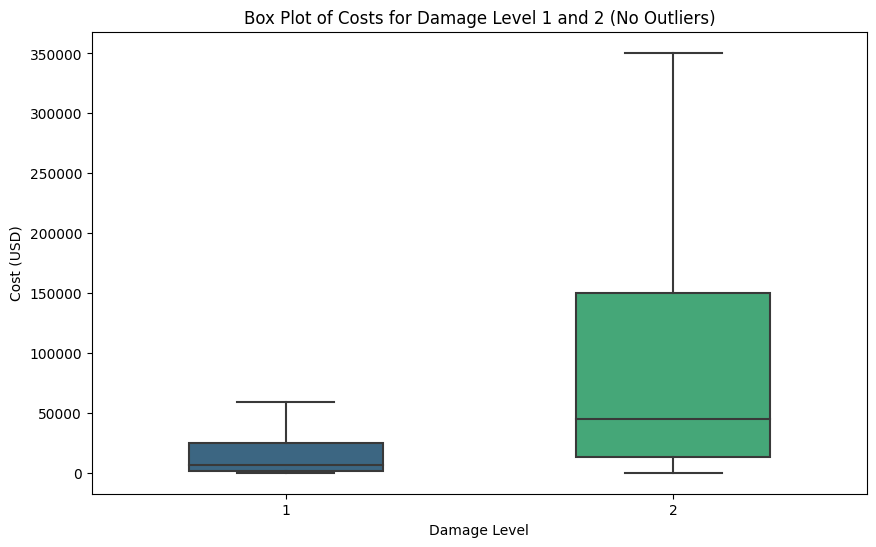

In [90]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Assuming you have a DataFrame named 'df' with 'Damage Level' and 'Cost' columns
# Replace 'your_dataframe.csv' with the actual file path if loading from a CSV file
# df = pd.read_csv('your_dataframe.csv')

# Filter DataFrame for Damage Level 1 and 2
filtered_df = damage_cost[damage_cost['DAMAGE_LEVEL'].isin([1, 2])]

# Create a box plot without outliers
plt.figure(figsize=(10, 6))
sns.boxplot(x='DAMAGE_LEVEL', y='COST_REPAIRS', data=filtered_df, width=0.5, palette='viridis', showfliers=False)

# Adding labels and title
plt.xlabel('Damage Level')
plt.ylabel('Cost (USD)')
plt.title('Box Plot of Costs for Damage Level 1 and 2 (No Outliers)')

# Show the plot
plt.show()


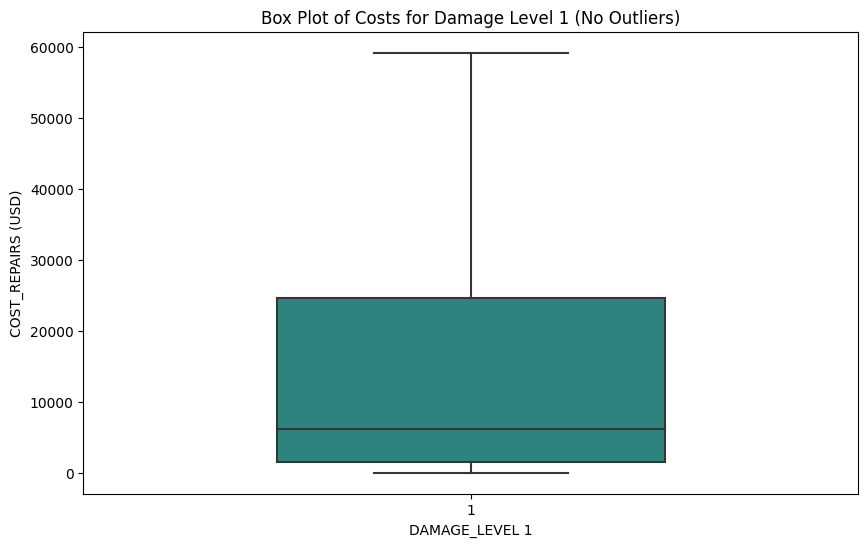

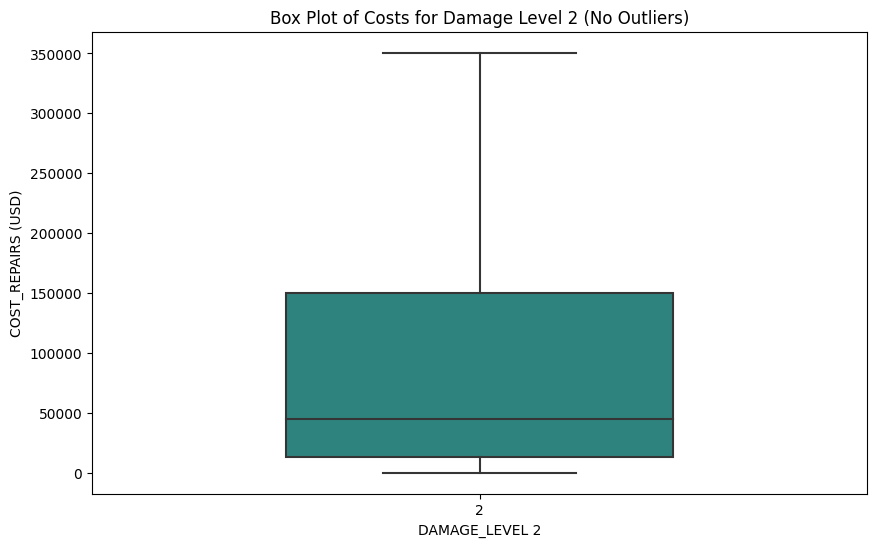

In [91]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Assuming you have a DataFrame named 'df' with 'Damage Level' and 'Cost' columns
# Replace 'your_dataframe.csv' with the actual file path if loading from a CSV file
# df = pd.read_csv('your_dataframe.csv')

# Filter DataFrame for Damage Level 1 and 2
df_damage_1 = damage_cost[damage_cost['DAMAGE_LEVEL'] == 1]
df_damage_2 = damage_cost[damage_cost['DAMAGE_LEVEL'] == 2]

# Create a box plot without outliers for Damage Level 1
plt.figure(figsize=(10, 6))
sns.boxplot(x='DAMAGE_LEVEL', y='COST_REPAIRS', data=df_damage_1, width=0.5, palette='viridis', showfliers=False)

# Adding labels and title for Damage Level 1
plt.xlabel('DAMAGE_LEVEL 1')
plt.ylabel('COST_REPAIRS (USD)')
plt.title('Box Plot of Costs for Damage Level 1 (No Outliers)')

# Show the plot for Damage Level 1
plt.show()

# Create a box plot without outliers for Damage Level 2
plt.figure(figsize=(10, 6))
sns.boxplot(x='DAMAGE_LEVEL', y='COST_REPAIRS', data=df_damage_2, width=0.5, palette='viridis', showfliers=False)

# Adding labels and title for Damage Level 2
plt.xlabel('DAMAGE_LEVEL 2')
plt.ylabel('COST_REPAIRS (USD)')
plt.title('Box Plot of Costs for Damage Level 2 (No Outliers)')

# Show the plot for Damage Level 2
plt.show()


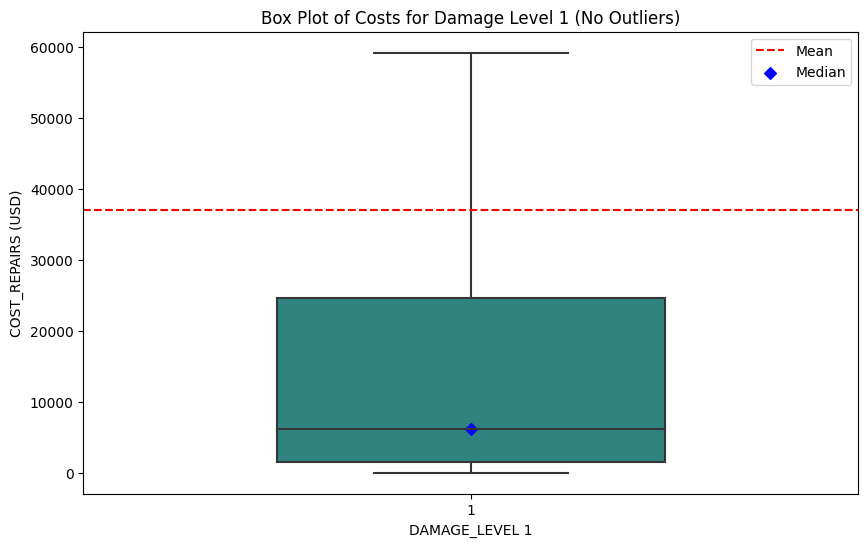

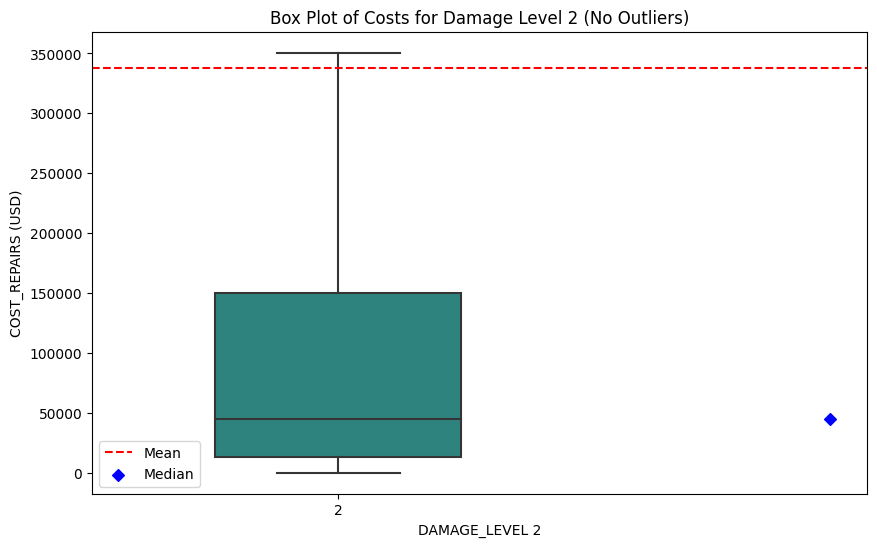

In [93]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Assuming you have a DataFrame named 'df' with 'DAMAGE_LEVEL' and 'COST_REPAIRS' columns
# Replace 'your_dataframe.csv' with the actual file path if loading from a CSV file
# df = pd.read_csv('your_dataframe.csv')

# Filter DataFrame for Damage Level 1 and 2
df_damage_1 = damage_cost[damage_cost['DAMAGE_LEVEL'] == 1]
df_damage_2 = damage_cost[damage_cost['DAMAGE_LEVEL'] == 2]

# Create a box plot without outliers for Damage Level 1
plt.figure(figsize=(10, 6))
sns.boxplot(x='DAMAGE_LEVEL', y='COST_REPAIRS', data=df_damage_1, width=0.5, palette='viridis', showfliers=False)

# Highlight mean and median for Damage Level 1
plt.axhline(y=df_damage_1['COST_REPAIRS'].mean(), color='red', linestyle='--', label='Mean')
plt.scatter([0], [df_damage_1['COST_REPAIRS'].median()], color='blue', marker='D', label='Median')

# Adding labels and title for Damage Level 1
plt.xlabel('DAMAGE_LEVEL 1')
plt.ylabel('COST_REPAIRS (USD)')
plt.title('Box Plot of Costs for Damage Level 1 (No Outliers)')
plt.legend()

# Show the plot for Damage Level 1
plt.show()

# Create a box plot without outliers for Damage Level 2
plt.figure(figsize=(10, 6))
sns.boxplot(x='DAMAGE_LEVEL', y='COST_REPAIRS', data=df_damage_2, width=0.5, palette='viridis', showfliers=False)

# Highlight mean and median for Damage Level 2
plt.axhline(y=df_damage_2['COST_REPAIRS'].mean(), color='red', linestyle='--', label='Mean')
plt.scatter([1], [df_damage_2['COST_REPAIRS'].median()], color='blue', marker='D', label='Median')

# Adding labels and title for Damage Level 2
plt.xlabel('DAMAGE_LEVEL 2')
plt.ylabel('COST_REPAIRS (USD)')
plt.title('Box Plot of Costs for Damage Level 2 (No Outliers)')
plt.legend()

# Show the plot for Damage Level 2
plt.show()


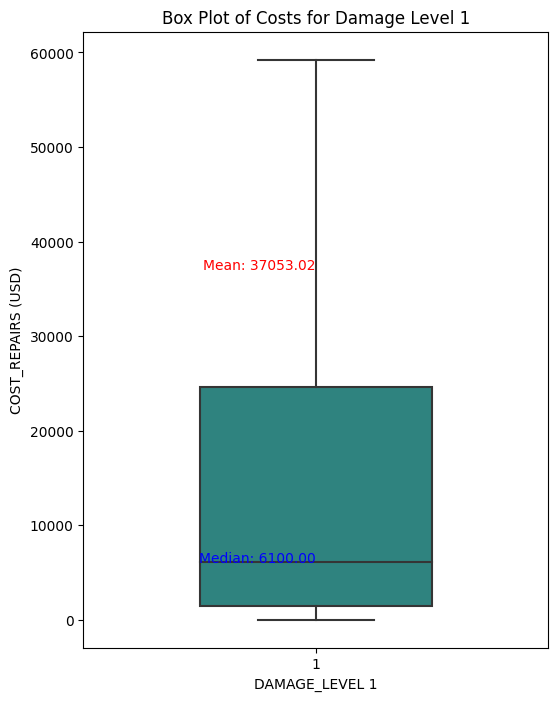

In [114]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Assuming you have a DataFrame named 'df' with 'DAMAGE_LEVEL' and 'COST_REPAIRS' columns
# Replace 'your_dataframe.csv' with the actual file path if loading from a CSV file
# df = pd.read_csv('your_dataframe.csv')

# Filter DataFrame for Damage Level 1 and 2
df_damage_1 = damage_cost[damage_cost['DAMAGE_LEVEL'] == 1]
df_damage_2 = damage_cost[damage_cost['DAMAGE_LEVEL'] == 2]

# Create a box plot without outliers for Damage Level 1
plt.figure(figsize=(6, 8))
sns.boxplot(x='DAMAGE_LEVEL', y='COST_REPAIRS', data=df_damage_1, width=0.5, palette='viridis', showfliers=False)

# Highlight mean and median for Damage Level 1
plt.text(0, df_damage_1['COST_REPAIRS'].mean(), f'Mean: {df_damage_1["COST_REPAIRS"].mean():.2f}', color='red', fontsize=10, ha='right')
plt.text(0, df_damage_1['COST_REPAIRS'].median(), f'Median: {df_damage_1["COST_REPAIRS"].median():.2f}', color='blue', fontsize=10, ha='right')

# Adding labels and title for Damage Level 1
plt.xlabel('DAMAGE_LEVEL 1')
plt.ylabel('COST_REPAIRS (USD)')
plt.title('Box Plot of Costs for Damage Level 1')

# Show the plot for Damage Level 1
plt.show()




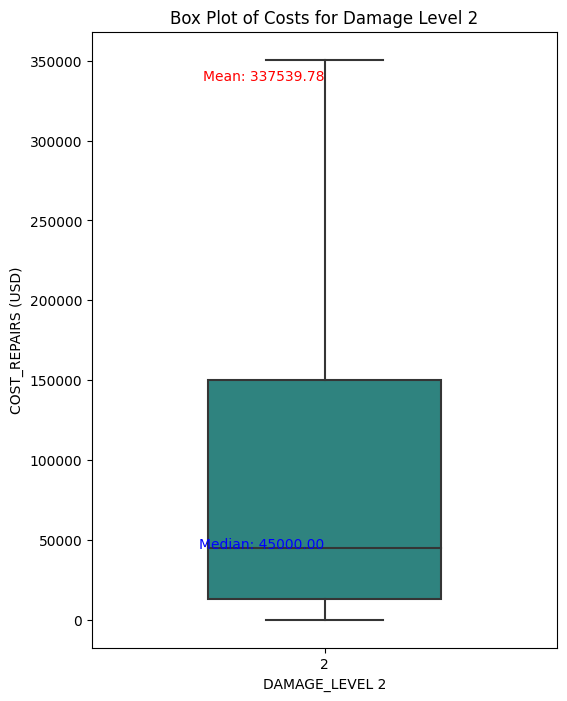

In [113]:
# Create a box plot without outliers for Damage Level 2
plt.figure(figsize=(6, 8))
sns.boxplot(x='DAMAGE_LEVEL', y='COST_REPAIRS', data=df_damage_2, width=0.5, palette='viridis', showfliers=False)

# Highlight mean and median for Damage Level 2
plt.text(0, df_damage_2['COST_REPAIRS'].mean(), f'Mean: {df_damage_2["COST_REPAIRS"].mean():.2f}', color='red', fontsize=10, ha='right')
plt.text(0, df_damage_2['COST_REPAIRS'].median(), f'Median: {df_damage_2["COST_REPAIRS"].median():.2f}', color='blue', fontsize=10, ha='right')

# Adding labels and title for Damage Level 2
plt.xlabel('DAMAGE_LEVEL 2')
plt.ylabel('COST_REPAIRS (USD)')
plt.title('Box Plot of Costs for Damage Level 2')

# Show the plot for Damage Level 2
plt.show()